In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the survey data
df = pd.read_excel('./SMU_survey_data.xlsx')

print("Dataset shape:", df.shape)
print("\nColumn names:")
for i, col in enumerate(df.columns):
    print(f"{i+1:3d}. {col}")

Dataset shape: (252, 91)

Column names:
  1. ResponseID
  2. Timestamp
  3. Age
  4. Gender
  5. YearOfStudy
  6. School
  7. Q4_stressLevels
  8. Q4_sleepQuality
  9. Q4_physicalHealth
 10. Q4_academicPressure
 11. Q4_socialConnectedness
 12. Q4_overallMentalHealth
 13. Q4_OverallHelathScore
 14. Q5_5WhatAreTheMainChallengesAffectingYourMentalHealthSelectUpTo3
 15. Q6_preSemesterBeforeClassesStarted
 16. Q6_startOfSemesterWeeks14
 17. Q6_midSemesterWeeks57ProjectAssignmentPeriod
 18. Q6_recessWeekWeek8
 19. Q6_endOfSemesterWeeks912FinalProjectAssignmentPeriod
 20. Q6_finalExamPeriod
 21. Q6_postSemesterAfterExamsEnded
 22. Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity
 23. Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxationMindfulnessTimeManagement
 24. Q9_9WhatMostMotivatesYouToTakeCareOfYourHealthSelectUpTo3
 25. Q10_10IfYouAreStrugglingHowLikelyWouldYouBeToSeekHelpWithYourPeersFamily
 26. Q11_mentalHealthWeek
 2

In [2]:
# Examine phase columns (Q6 appears to have different semester phases)
phase_cols = [col for col in df.columns if 'Q6_' in col]
print("Phase columns (Q6):")
for i, col in enumerate(phase_cols):
    print(f"{i+1}. {col}")

print("\nSample values from phase columns:")
print(df[phase_cols].head())

Phase columns (Q6):
1. Q6_preSemesterBeforeClassesStarted
2. Q6_startOfSemesterWeeks14
3. Q6_midSemesterWeeks57ProjectAssignmentPeriod
4. Q6_recessWeekWeek8
5. Q6_endOfSemesterWeeks912FinalProjectAssignmentPeriod
6. Q6_finalExamPeriod
7. Q6_postSemesterAfterExamsEnded

Sample values from phase columns:
   Q6_preSemesterBeforeClassesStarted  Q6_startOfSemesterWeeks14  \
0                                   2                          2   
1                                   5                          5   
2                                   5                          5   
3                                   3                          5   
4                                   4                          4   

   Q6_midSemesterWeeks57ProjectAssignmentPeriod  Q6_recessWeekWeek8  \
0                                             3                   2   
1                                             4                   4   
2                                             4                   5   
3  

In [3]:
# Check the Q5_5 mental health challenges column
print("Q5_5 Mental Health Challenges column:")
print(f"Column name: {df.columns[12]}")
print("\nSample values:")
sample_values = df['Q5_5WhatAreTheMainChallengesAffectingYourMentalHealthSelectUpTo3'].dropna().head(10)
for i, val in enumerate(sample_values):
    print(f"{i+1:2d}. {val}")

print(f"\nUnique values count: {df['Q5_5WhatAreTheMainChallengesAffectingYourMentalHealthSelectUpTo3'].nunique()}")
print(f"Non-null count: {df['Q5_5WhatAreTheMainChallengesAffectingYourMentalHealthSelectUpTo3'].count()}")

Q5_5 Mental Health Challenges column:
Column name: Q4_OverallHelathScore

Sample values:
 1. Workload Management, Career uncertainty
 2. Workload Management, Sleep deprivation, Career uncertainty
 3. Career uncertainty, Social/relationship issues
 4. Sleep deprivation, Financial concerns, Career uncertainty
 5. Workload Management, Sleep deprivation, Career uncertainty
 6. Financial concerns, Career uncertainty, Anxiety
 7. Workload Management, Career uncertainty, Anxiety
 8. Workload Management, Financial concerns, Career uncertainty
 9. Workload Management, Sleep deprivation, Career uncertainty
10. Workload Management, Sleep deprivation, Career uncertainty

Unique values count: 45
Non-null count: 252


In [21]:
# Analyze all unique challenges mentioned in Q5_5
challenges_set = set()
for response in df['Q5_5WhatAreTheMainChallengesAffectingYourMentalHealthSelectUpTo3'].dropna():
    # Split by comma and clean up
    challenges = [challenge.strip() for challenge in response.split(',')]
    challenges_set.update(challenges)

print("All unique mental health challenges mentioned:")
for i, challenge in enumerate(sorted(challenges_set), 1):
    print(f"{i:2d}. {challenge}")

# Count frequency of each challenge
challenge_counts = {}
for response in df['Q5_5WhatAreTheMainChallengesAffectingYourMentalHealthSelectUpTo3'].dropna():
    challenges = [challenge.strip() for challenge in response.split(',')]
    for challenge in challenges:
        challenge_counts[challenge] = challenge_counts.get(challenge, 0) + 1

print(f"\nTop 10 most common challenges:")
sorted_challenges = sorted(challenge_counts.items(), key=lambda x: x[1], reverse=True)
for challenge, count in sorted_challenges[:10]:
    print(f"{challenge}: {count} responses")

All unique mental health challenges mentioned:
 1. Actuarial exams
 2. Anxiety
 3. Career uncertainty
 4. Financial concerns
 5. Sleep deprivation
 6. Social/relationship issues
 7. Unhealthy Social Media Use
 8. Workload Management

Top 10 most common challenges:
Career uncertainty: 163 responses
Workload Management: 147 responses
Sleep deprivation: 116 responses
Anxiety: 85 responses
Social/relationship issues: 57 responses
Financial concerns: 48 responses
Unhealthy Social Media Use: 42 responses
Actuarial exams: 2 responses


In [4]:
# SOLUTION 1: Transform phase data for Tableau (Q6 columns)
print("=== SOLUTION 1: PHASE DATA TRANSFORMATION ===")

# Create a long format for phase data
phase_data = []
phase_cols = [col for col in df.columns if 'Q6_' in col]

# Clean up phase column names for better visualization
phase_names = {
    'Q6_preSemesterBeforeClassesStarted': 'Pre-Semester',
    'Q6_startOfSemesterWeeks14': 'Start of Semester (Weeks 1-4)',
    'Q6_midSemesterWeeks57ProjectAssignmentPeriod': 'Mid-Semester (Weeks 5-7)',
    'Q6_recessWeekWeek8': 'Recess Week (Week 8)',
    'Q6_endOfSemesterWeeks912FinalProjectAssignmentPeriod': 'End of Semester (Weeks 9-12)',
    'Q6_finalExamPeriod': 'Final Exam Period',
    'Q6_postSemesterAfterExamsEnded': 'Post-Semester'
}

for _, row in df.iterrows():
    for phase_col in phase_cols:
        phase_data.append({
            'ResponseID': row['ResponseID'],
            'Age': row['Age'],
            'Gender': row['Gender'],
            'YearOfStudy': row['YearOfStudy'],
            'School': row['School'],
            'Phase': phase_names[phase_col],
            'MentalHealthRating': row[phase_col]
        })

df_phases = pd.DataFrame(phase_data)
print(f"Phase data transformed: {df_phases.shape[0]} rows")
print("\nSample of transformed phase data:")
print(df_phases.head())

# Save transformed phase data as Excel
df_phases.to_excel('./phase_data_for_tableau.xlsx', index=False)
print("\nPhase data saved as 'phase_data_for_tableau.xlsx'")

=== SOLUTION 1: PHASE DATA TRANSFORMATION ===
Phase data transformed: 1764 rows

Sample of transformed phase data:
  ResponseID  Age  Gender YearOfStudy School                          Phase  \
0      S0001   22  Female      Year 4    SOB                   Pre-Semester   
1      S0001   22  Female      Year 4    SOB  Start of Semester (Weeks 1-4)   
2      S0001   22  Female      Year 4    SOB       Mid-Semester (Weeks 5-7)   
3      S0001   22  Female      Year 4    SOB           Recess Week (Week 8)   
4      S0001   22  Female      Year 4    SOB   End of Semester (Weeks 9-12)   

   MentalHealthRating  
0                   2  
1                   2  
2                   3  
3                   2  
4                   2  

Phase data saved as 'phase_data_for_tableau.xlsx'


In [26]:
# SOLUTION 2: Transform Q5_5 mental health challenges for Tableau
print("\n=== SOLUTION 2: MENTAL HEALTH CHALLENGES TRANSFORMATION ===")

# Create binary columns for each challenge
challenges_data = []
all_challenges = ['Career uncertainty', 'Workload Management', 'Sleep deprivation', 
                 'Anxiety', 'Social/relationship issues', 'Financial concerns', 
                 'Unhealthy Social Media Use', 'Actuarial exams']

for _, row in df.iterrows():
    challenge_row = {
        'ResponseID': row['ResponseID'],
        'Age': row['Age'],
        'Gender': row['Gender'],
        'YearOfStudy': row['YearOfStudy'],
        'School': row['School']
    }
    
    # Get challenges for this response
    if pd.notna(row['Q5_5WhatAreTheMainChallengesAffectingYourMentalHealthSelectUpTo3']):
        response_challenges = [c.strip() for c in row['Q5_5WhatAreTheMainChallengesAffectingYourMentalHealthSelectUpTo3'].split(',')]
    else:
        response_challenges = []
    
    # Create binary indicators for each challenge
    for challenge in all_challenges:
        challenge_row[f'Has_{challenge.replace(" ", "_").replace("/", "_")}'] = 1 if challenge in response_challenges else 0
    
    challenges_data.append(challenge_row)

df_challenges = pd.DataFrame(challenges_data)
print(f"Challenges data transformed: {df_challenges.shape}")
print("\nSample of transformed challenges data:")
print(df_challenges.head())

# Save transformed challenges data as Excel
df_challenges.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/challenges_data_for_tableau.xlsx', index=False)
print("\nChallenges data saved as 'challenges_data_for_tableau.xlsx'")


=== SOLUTION 2: MENTAL HEALTH CHALLENGES TRANSFORMATION ===
Challenges data transformed: (252, 13)

Sample of transformed challenges data:
  ResponseID  Age  Gender YearOfStudy School  Has_Career_uncertainty  \
0      S0001   22  Female      Year 4    SOB                       1   
1      S0002   24    Male      Year 4    CIS                       1   
2      S0003   24    Male      Year 4    SOE                       1   
3      S0004   24    Male      Year 4    CIS                       1   
4      S0005   21  Female      Year 3   SOSS                       1   

   Has_Workload_Management  Has_Sleep_deprivation  Has_Anxiety  \
0                        1                      0            0   
1                        1                      1            0   
2                        0                      0            0   
3                        0                      1            0   
4                        1                      1            0   

   Has_Social_relationship_iss

In [27]:
# SOLUTION 3: Long format for challenges (alternative approach)
print("\n=== SOLUTION 3: CHALLENGES IN LONG FORMAT ===")

# Create a long format where each challenge gets its own row
challenges_long = []

for _, row in df.iterrows():
    if pd.notna(row['Q5_5WhatAreTheMainChallengesAffectingYourMentalHealthSelectUpTo3']):
        response_challenges = [c.strip() for c in row['Q5_5WhatAreTheMainChallengesAffectingYourMentalHealthSelectUpTo3'].split(',')]
        
        for challenge in response_challenges:
            challenges_long.append({
                'ResponseID': row['ResponseID'],
                'Age': row['Age'],
                'Gender': row['Gender'],
                'YearOfStudy': row['YearOfStudy'],
                'School': row['School'],
                'Challenge': challenge
            })

df_challenges_long = pd.DataFrame(challenges_long)
print(f"Long format challenges data: {df_challenges_long.shape}")
print("\nSample of long format challenges data:")
print(df_challenges_long.head(10))

# Save long format challenges data as Excel
df_challenges_long.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/challenges_long_for_tableau.xlsx', index=False)
print("\nLong format challenges data saved as 'challenges_long_for_tableau.xlsx'")


=== SOLUTION 3: CHALLENGES IN LONG FORMAT ===
Long format challenges data: (660, 6)

Sample of long format challenges data:
  ResponseID  Age  Gender YearOfStudy School                   Challenge
0      S0001   22  Female      Year 4    SOB         Workload Management
1      S0001   22  Female      Year 4    SOB          Career uncertainty
2      S0002   24    Male      Year 4    CIS         Workload Management
3      S0002   24    Male      Year 4    CIS           Sleep deprivation
4      S0002   24    Male      Year 4    CIS          Career uncertainty
5      S0003   24    Male      Year 4    SOE          Career uncertainty
6      S0003   24    Male      Year 4    SOE  Social/relationship issues
7      S0004   24    Male      Year 4    CIS           Sleep deprivation
8      S0004   24    Male      Year 4    CIS          Financial concerns
9      S0004   24    Male      Year 4    CIS          Career uncertainty

Long format challenges data saved as 'challenges_long_for_tableau.xlsx'

# Tableau Chart Instructions: Student Mental Health Across Academic Phases by School

## Step-by-Step Tableau Instructions:

### 1. **Connect to Data**

- Open Tableau
- Click "Microsoft Excel"
- Navigate to and select `phase_data_for_tableau.xlsx`
- Click "Open"

### 2. **Build the Chart**

- **Drag "Phase" to Columns shelf** (X-axis)
- **Drag "MentalHealthRating" to Rows shelf** (Y-axis)
- **Drag "School" to Color** (this creates different colored lines for each school)
- **Change Mark Type to "Line"** (click the dropdown in Marks card)

### 3. **Configure Aggregation**

- Tableau will automatically aggregate MentalHealthRating
- Make sure it's set to "Average" (AVG) - this gives you the overall mental health score
- Right-click on SUM(MentalHealthRating) in Rows and select "Measure" → "Average"

### 4. **Formatting Tips**

- **Title**: Right-click chart → "Edit Title" → "Student Mental Health Across Academic Phases by School"
- **Y-axis**: Right-click Y-axis → "Edit Axis" → Title: "Average Mental Health Score"
- **X-axis**: Right-click X-axis → "Edit Axis" → Title: "Academic Phase"
- **Legend**: The School legend will appear automatically on the right

### 5. **Expected Result**

- X-axis: 7 phases (Pre-Semester, Start of Semester, etc.)
- Y-axis: Average mental health scores (1-5 scale)
- Multiple colored lines: One for each school (SOB, CIS, SOE, SOSS, etc.)
- Each line shows how that school's average mental health changes across phases


=== PREVIEW: Mental Health by Phase and School ===
Sample of what your Tableau chart will display:
                           Phase School  MentalHealthRating
0   End of Semester (Weeks 9-12)    CIS            2.555556
1   End of Semester (Weeks 9-12)   SCIS            2.252033
2   End of Semester (Weeks 9-12)    SOA            2.350000
3   End of Semester (Weeks 9-12)    SOB            2.147059
4   End of Semester (Weeks 9-12)    SOE            2.653846
5   End of Semester (Weeks 9-12)    SOL            2.000000
6   End of Semester (Weeks 9-12)   SOSS            2.400000
7              Final Exam Period    CIS            2.500000
8              Final Exam Period   SCIS            2.268293
9              Final Exam Period    SOA            2.400000
10             Final Exam Period    SOB            2.058824
11             Final Exam Period    SOE            2.346154
12             Final Exam Period    SOL            2.000000
13             Final Exam Period   SOSS            2.360000
1

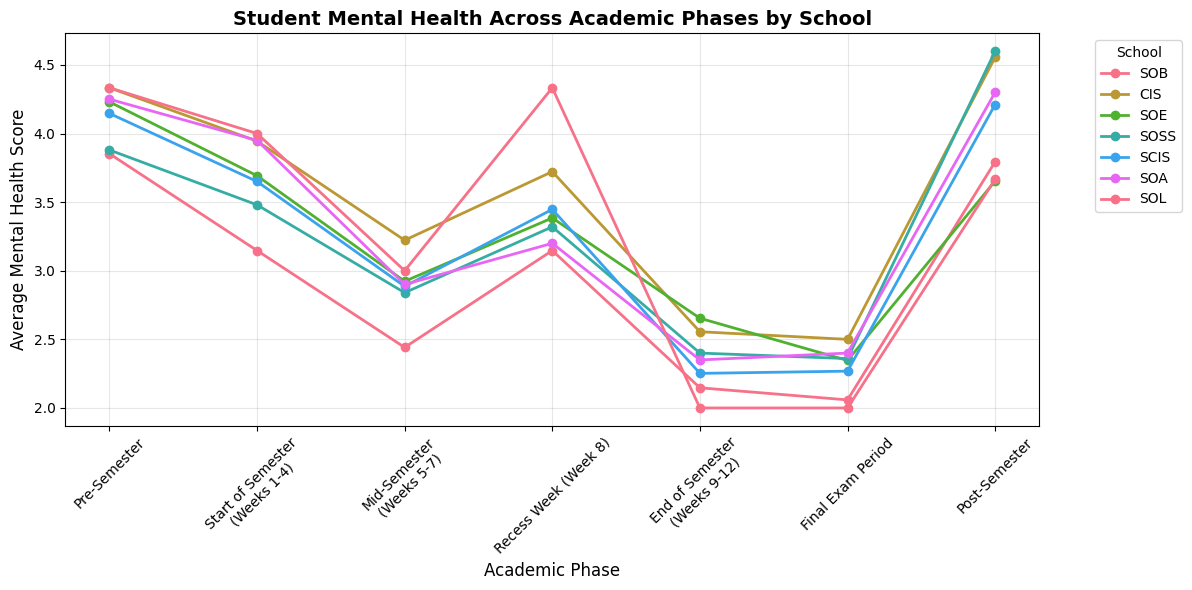


📊 This preview shows exactly what your Tableau chart will look like!


In [28]:
# Preview the chart structure using your phase data
print("=== PREVIEW: Mental Health by Phase and School ===")

# Load the phase data we created
df_phases = pd.read_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/phase_data_for_tableau.xlsx')

# Calculate average mental health by phase and school (this is what Tableau will show)
phase_school_avg = df_phases.groupby(['Phase', 'School'])['MentalHealthRating'].mean().reset_index()

print("Sample of what your Tableau chart will display:")
print(phase_school_avg.head(15))

print(f"\nUnique Schools in your data: {sorted(df_phases['School'].unique())}")
print(f"Unique Phases in your data: {df_phases['Phase'].unique()}")

# Show the range of mental health scores
print(f"\nMental Health Rating Range: {df_phases['MentalHealthRating'].min()} to {df_phases['MentalHealthRating'].max()}")
print(f"Average across all: {df_phases['MentalHealthRating'].mean():.2f}")

# Create a simple preview plot
plt.figure(figsize=(12, 6))

# Define phase order for proper x-axis ordering
phase_order = ['Pre-Semester', 'Start of Semester (Weeks 1-4)', 'Mid-Semester (Weeks 5-7)', 
               'Recess Week (Week 8)', 'End of Semester (Weeks 9-12)', 
               'Final Exam Period', 'Post-Semester']

# Plot lines for each school
for school in df_phases['School'].unique():
    school_data = phase_school_avg[phase_school_avg['School'] == school]
    school_data = school_data.set_index('Phase').reindex(phase_order)
    plt.plot(range(len(phase_order)), school_data['MentalHealthRating'], 
             marker='o', label=school, linewidth=2)

plt.title('Student Mental Health Across Academic Phases by School', fontsize=14, fontweight='bold')
plt.xlabel('Academic Phase', fontsize=12)
plt.ylabel('Average Mental Health Score', fontsize=12)
plt.xticks(range(len(phase_order)), [p.replace(' (Weeks ', '\n(Weeks ') for p in phase_order], rotation=45)
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 This preview shows exactly what your Tableau chart will look like!")

# Tableau Chart Instructions: Top Challenges Affecting Mental Health

## Step-by-Step Tableau Instructions:

### 1. **Connect to Data**

- Open Tableau
- Click "Microsoft Excel"
- Navigate to and select `challenges_long_for_tableau.xlsx`
- Click "Open"

### 2. **Build the Chart (Horizontal Bar Chart)**

- **Drag "Challenge" to Rows shelf** (Y-axis)
- **Drag "Challenge" to Columns shelf** (X-axis)
- **Change aggregation to "Count"** (Tableau will show CNT(Challenge))
- **Sort descending** by count (click sort icon on toolbar)

### 3. **Alternative: Add Demographics Breakdown**

**Option A - By School:**

- **Drag "School" to Color** (shows breakdown by school)
- Creates stacked horizontal bars

**Option B - By Gender:**

- **Drag "Gender" to Color** (shows breakdown by gender)
- Creates stacked horizontal bars

**Option C - By Year of Study:**

- **Drag "YearOfStudy" to Color** (shows breakdown by year)
- Creates stacked horizontal bars

### 4. **Formatting Tips**

- **Title**: "Top Mental Health Challenges Among Students"
- **X-axis**: "Number of Students"
- **Y-axis**: "Mental Health Challenge"
- **Sort**: Highest to lowest (most common challenges at top)

### 5. **Expected Result**

- Horizontal bars showing challenge frequency
- Career uncertainty and Workload Management likely at the top
- Optional color coding by demographics
- Clear ranking of most/least common challenges


=== PREVIEW: Top Mental Health Challenges ===
Top challenges ranking (what your Tableau chart will display):
                    Challenge  Count
0          Career uncertainty    163
1         Workload Management    147
2           Sleep deprivation    116
3                     Anxiety     85
4  Social/relationship issues     57
5          Financial concerns     48
6  Unhealthy Social Media Use     42
7             Actuarial exams      2


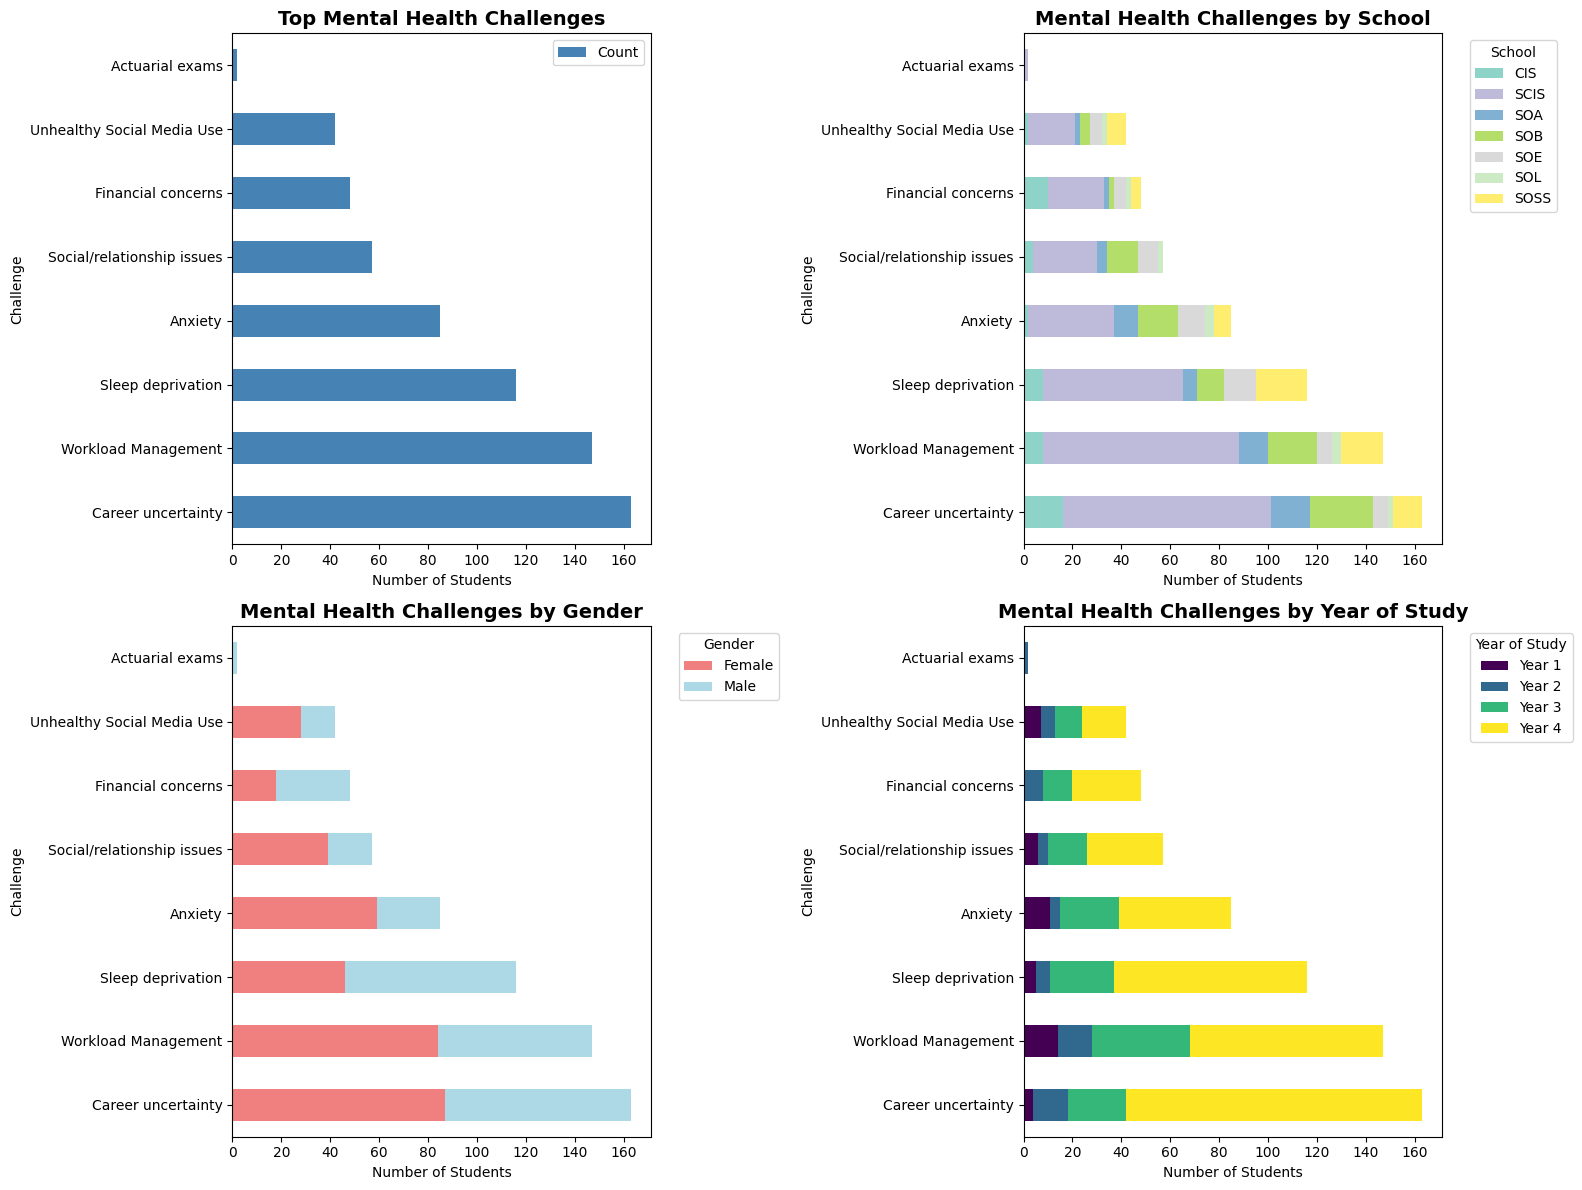


📊 Total responses: 660
📊 Unique challenges: 8
📊 Students who provided responses: 252

🎯 These previews show exactly what your Tableau charts will look like!


In [29]:
# Preview: Top Challenges Affecting Mental Health Chart
print("=== PREVIEW: Top Mental Health Challenges ===")

# Load the challenges data we created
df_challenges_long = pd.read_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/challenges_long_for_tableau.xlsx')

# Count frequency of each challenge (this is what Tableau will show)
challenge_counts = df_challenges_long['Challenge'].value_counts().reset_index()
challenge_counts.columns = ['Challenge', 'Count']

print("Top challenges ranking (what your Tableau chart will display):")
print(challenge_counts)

# Create preview visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Basic horizontal bar chart
challenge_counts.plot(x='Challenge', y='Count', kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Top Mental Health Challenges', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Students')
ax1.set_ylabel('Challenge')

# 2. Breakdown by School
school_challenge = df_challenges_long.groupby(['Challenge', 'School']).size().reset_index(name='Count')
school_pivot = school_challenge.pivot(index='Challenge', columns='School', values='Count').fillna(0)
school_pivot = school_pivot.reindex(challenge_counts['Challenge'])  # Sort by total frequency
school_pivot.plot(kind='barh', stacked=True, ax=ax2, colormap='Set3')
ax2.set_title('Mental Health Challenges by School', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Students')
ax2.set_ylabel('Challenge')
ax2.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Breakdown by Gender
gender_challenge = df_challenges_long.groupby(['Challenge', 'Gender']).size().reset_index(name='Count')
gender_pivot = gender_challenge.pivot(index='Challenge', columns='Gender', values='Count').fillna(0)
gender_pivot = gender_pivot.reindex(challenge_counts['Challenge'])  # Sort by total frequency
gender_pivot.plot(kind='barh', stacked=True, ax=ax3, color=['lightcoral', 'lightblue'])
ax3.set_title('Mental Health Challenges by Gender', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Students')
ax3.set_ylabel('Challenge')
ax3.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Breakdown by Year of Study
year_challenge = df_challenges_long.groupby(['Challenge', 'YearOfStudy']).size().reset_index(name='Count')
year_pivot = year_challenge.pivot(index='Challenge', columns='YearOfStudy', values='Count').fillna(0)
year_pivot = year_pivot.reindex(challenge_counts['Challenge'])  # Sort by total frequency
year_pivot.plot(kind='barh', stacked=True, ax=ax4, colormap='viridis')
ax4.set_title('Mental Health Challenges by Year of Study', fontsize=14, fontweight='bold')
ax4.set_xlabel('Number of Students')
ax4.set_ylabel('Challenge')
ax4.legend(title='Year of Study', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print(f"\n📊 Total responses: {len(df_challenges_long)}")
print(f"📊 Unique challenges: {df_challenges_long['Challenge'].nunique()}")
print(f"📊 Students who provided responses: {df_challenges_long['ResponseID'].nunique()}")
print("\n🎯 These previews show exactly what your Tableau charts will look like!")

In [30]:
# Examine columns G to L (columns 6 to 11 in 0-based indexing)
print("=== ANALYZING COLUMNS G TO L ===")

# Get columns G to L (6 to 11 in 0-based indexing)
cols_g_to_l = df.columns[6:12].tolist()
print("Columns G to L:")
for i, col in enumerate(cols_g_to_l, 7):  # Start from G=7
    print(f"{chr(64+i)}. {col}")

print(f"\nSample data from these columns:")
print(df[cols_g_to_l].head(10))

print(f"\nData types:")
print(df[cols_g_to_l].dtypes)

print(f"\nBasic statistics:")
print(df[cols_g_to_l].describe())

print(f"\nMissing values:")
print(df[cols_g_to_l].isnull().sum())

# Check unique values for each column to understand the scale
print(f"\nUnique values in each column:")
for col in cols_g_to_l:
    unique_vals = sorted(df[col].dropna().unique())
    print(f"{col}: {unique_vals}")

# Check what these columns represent (likely Likert scale ratings)
print(f"\nColumn name analysis:")
for col in cols_g_to_l:
    clean_name = col.replace('Q4_', '').replace('Q5_', '').replace('Q6_', '')
    print(f"{col} → {clean_name}")

=== ANALYZING COLUMNS G TO L ===
Columns G to L:
G. Q4_stressLevels
H. Q4_sleepQuality
I. Q4_physicalHealth
J. Q4_academicPressure
K. Q4_socialConnectedness
L. Q4_overallMentalHealth

Sample data from these columns:
   Q4_stressLevels  Q4_sleepQuality  Q4_physicalHealth  Q4_academicPressure  \
0                2                2                  3                    2   
1                3                3                  4                    4   
2                3                4                  4                    4   
3                5                1                  5                    5   
4                2                2                  3                    3   
5                3                3                  3                    3   
6                1                2                  2                    2   
7                3                3                  3                    3   
8                2                2                  3                   

# Tableau Chart Recommendations for Q4 Wellness Dimensions (Columns G-L)

## **Data Overview:**

- **6 wellness dimensions** on 1-5 Likert scale
- **Stress Levels, Sleep Quality, Physical Health, Academic Pressure, Social Connectedness, Overall Mental Health**
- **252 complete responses, no missing data**

## **Recommended Chart Types:**

### **1. Radar/Spider Chart** 🕸️

**Perfect for:** Comparing wellness profiles across demographics

- **Transform to:** Long format needed
- **Use:** Show average scores for each dimension by School/Gender/Year

### **2. Horizontal Bar Chart** 📊

**Perfect for:** Ranking wellness dimensions by average score

- **Transform to:** Long format needed
- **Use:** Compare which dimensions are strongest/weakest

### **3. Heatmap** 🔥

**Perfect for:** Showing wellness patterns across schools

- **Transform to:** Pivot table format
- **Use:** Schools vs Dimensions with color-coded average scores

### **4. Box Plot** 📦

**Perfect for:** Distribution analysis and outlier detection

- **Transform to:** Long format needed
- **Use:** Show score distributions for each dimension

### **5. Correlation Matrix** 🔗

**Perfect for:** Understanding relationships between dimensions

- **Transform:** Keep wide format or use correlation coefficient data
- **Use:** See which wellness aspects are related


In [31]:
# SOLUTION 4: Transform Q4 wellness dimensions for Tableau
print("=== SOLUTION 4: Q4 WELLNESS DIMENSIONS TRANSFORMATION ===")

# Define wellness dimension columns and clean names
wellness_cols = ['Q4_stressLevels', 'Q4_sleepQuality', 'Q4_physicalHealth', 
                'Q4_academicPressure', 'Q4_socialConnectedness', 'Q4_overallMentalHealth']

wellness_names = {
    'Q4_stressLevels': 'Stress Levels',
    'Q4_sleepQuality': 'Sleep Quality', 
    'Q4_physicalHealth': 'Physical Health',
    'Q4_academicPressure': 'Academic Pressure',
    'Q4_socialConnectedness': 'Social Connectedness',
    'Q4_overallMentalHealth': 'Overall Mental Health'
}

# 1. Long format for radar charts, box plots, bar charts
wellness_long = []

for _, row in df.iterrows():
    for col in wellness_cols:
        wellness_long.append({
            'ResponseID': row['ResponseID'],
            'Age': row['Age'],
            'Gender': row['Gender'],
            'YearOfStudy': row['YearOfStudy'],
            'School': row['School'],
            'WellnessDimension': wellness_names[col],
            'Score': row[col]
        })

df_wellness_long = pd.DataFrame(wellness_long)
print(f"Long format wellness data: {df_wellness_long.shape}")
print("\nSample of long format wellness data:")
print(df_wellness_long.head(10))

# Save long format wellness data
df_wellness_long.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/wellness_long_for_tableau.xlsx', index=False)
print("\nLong format wellness data saved as 'wellness_long_for_tableau.xlsx'")

# 2. Summary statistics for heatmaps
wellness_summary = df_wellness_long.groupby(['School', 'WellnessDimension'])['Score'].mean().reset_index()
wellness_summary['Score'] = wellness_summary['Score'].round(2)
print(f"\nSummary by School and Dimension:")
print(wellness_summary.head(15))

# Save summary data for heatmaps
wellness_summary.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/wellness_summary_for_tableau.xlsx', index=False)
print("\nWellness summary data saved as 'wellness_summary_for_tableau.xlsx'")

# 3. Correlation matrix data
wellness_wide = df[['ResponseID', 'School', 'Gender', 'YearOfStudy'] + wellness_cols].copy()
wellness_wide.columns = ['ResponseID', 'School', 'Gender', 'YearOfStudy'] + [wellness_names[col] for col in wellness_cols]

# Save wide format with clean names for correlation analysis
wellness_wide.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/wellness_wide_for_tableau.xlsx', index=False)
print("\nWide format wellness data saved as 'wellness_wide_for_tableau.xlsx'")

=== SOLUTION 4: Q4 WELLNESS DIMENSIONS TRANSFORMATION ===
Long format wellness data: (1512, 7)

Sample of long format wellness data:
  ResponseID  Age  Gender YearOfStudy School      WellnessDimension  Score
0      S0001   22  Female      Year 4    SOB          Stress Levels      2
1      S0001   22  Female      Year 4    SOB          Sleep Quality      2
2      S0001   22  Female      Year 4    SOB        Physical Health      3
3      S0001   22  Female      Year 4    SOB      Academic Pressure      2
4      S0001   22  Female      Year 4    SOB   Social Connectedness      2
5      S0001   22  Female      Year 4    SOB  Overall Mental Health      3
6      S0002   24    Male      Year 4    CIS          Stress Levels      3
7      S0002   24    Male      Year 4    CIS          Sleep Quality      3
8      S0002   24    Male      Year 4    CIS        Physical Health      4
9      S0002   24    Male      Year 4    CIS      Academic Pressure      4

Long format wellness data saved as 'welln

# Specific Tableau Chart Instructions for Q4 Wellness Dimensions

## **1. Radar Chart: Wellness Profile by School** 🕸️

**File:** `wellness_summary_for_tableau.xlsx`

**Steps:**

1. Connect to Excel file
2. **Drag "WellnessDimension" → Columns**
3. **Drag "Score" → Rows**
4. **Drag "School" → Color**
5. **Change Mark Type to "Line"**
6. **Add "WellnessDimension" to Path** (creates radar effect)
7. **Format:** Circular axis, 1-5 scale

## **2. Horizontal Bar Chart: Average Wellness Scores** 📊

**File:** `wellness_long_for_tableau.xlsx`

**Steps:**

1. **Drag "WellnessDimension" → Rows**
2. **Drag "Score" → Columns** (ensure it's AVG)
3. **Sort descending** by average score
4. **Optional:** Add "School" to Color for breakdown

## **3. Heatmap: Schools vs Wellness Dimensions** 🔥

**File:** `wellness_summary_for_tableau.xlsx`

**Steps:**

1. **Drag "School" → Rows**
2. **Drag "WellnessDimension" → Columns**
3. **Drag "Score" → Color**
4. **Change Mark Type to "Square"**
5. **Format:** Color scale from red (low) to green (high)

## **4. Box Plot: Score Distributions** 📦

**File:** `wellness_long_for_tableau.xlsx`

**Steps:**

1. **Drag "WellnessDimension" → Columns**
2. **Drag "Score" → Rows**
3. **Change Mark Type to "Circle"**
4. **Analytics → Add Box Plot**
5. **Optional:** Add "School" to Color

## **5. Correlation Heatmap** 🔗

**File:** `wellness_wide_for_tableau.xlsx`

**Steps:**

1. Create calculated fields for correlations
2. Use correlation coefficients between dimensions
3. Show as heatmap with correlation values


=== PREVIEW: Q4 Wellness Dimensions Charts ===


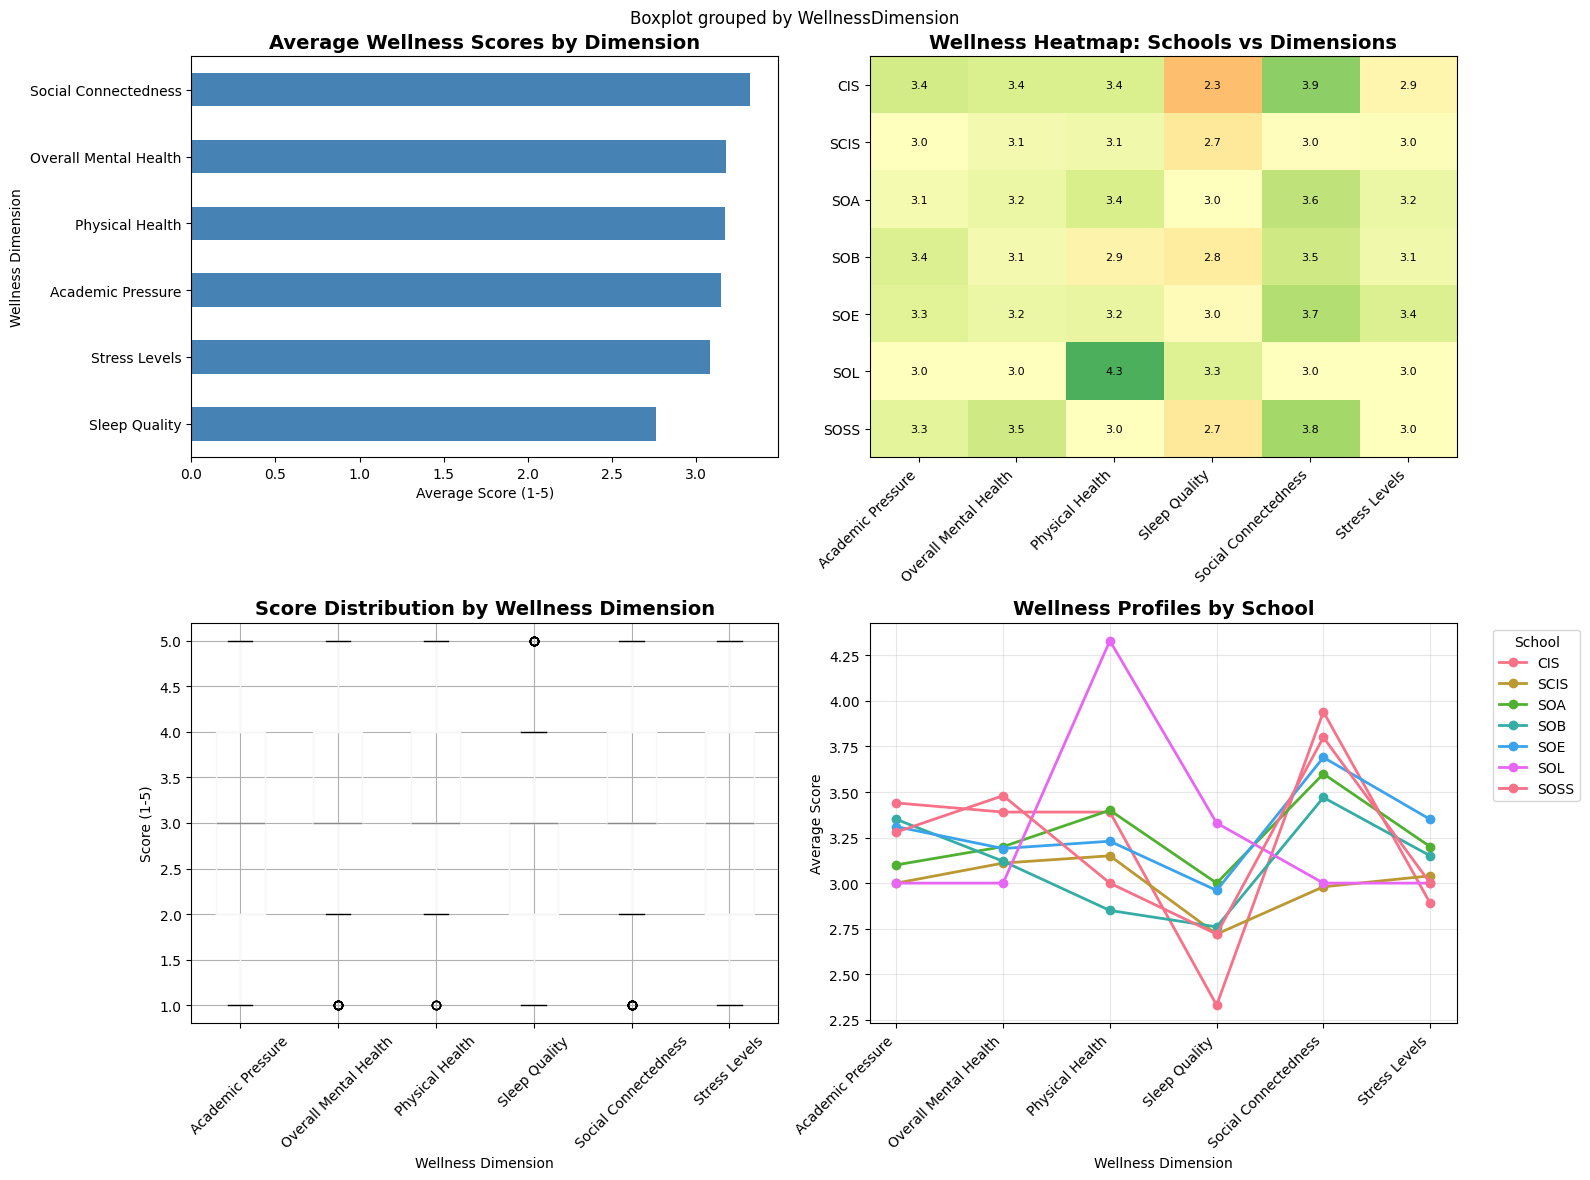


📊 KEY INSIGHTS:
🏆 Highest scoring dimension: Social Connectedness (3.32)
⚠️ Lowest scoring dimension: Sleep Quality (2.76)

📈 School Rankings (by overall wellness average):
1. SOE: 3.29
2. SOL: 3.28
3. SOA: 3.25
4. CIS: 3.23
5. SOSS: 3.21
6. SOB: 3.12
7. SCIS: 3.00

🎯 These previews show exactly what your Tableau charts will look like!


In [32]:
# Preview: Wellness Dimensions Charts
print("=== PREVIEW: Q4 Wellness Dimensions Charts ===")

# Load the data we created
df_wellness_long = pd.read_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/wellness_long_for_tableau.xlsx')
df_wellness_summary = pd.read_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/wellness_summary_for_tableau.xlsx')

# Create comprehensive preview visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Average scores by dimension (Bar Chart)
dimension_avg = df_wellness_long.groupby('WellnessDimension')['Score'].mean().sort_values(ascending=True)
dimension_avg.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Average Wellness Scores by Dimension', fontsize=14, fontweight='bold')
ax1.set_xlabel('Average Score (1-5)')
ax1.set_ylabel('Wellness Dimension')

# 2. Heatmap: Schools vs Wellness Dimensions
heatmap_data = df_wellness_summary.pivot(index='School', columns='WellnessDimension', values='Score')
im = ax2.imshow(heatmap_data.values, cmap='RdYlGn', aspect='auto', vmin=1, vmax=5)
ax2.set_xticks(range(len(heatmap_data.columns)))
ax2.set_yticks(range(len(heatmap_data.index)))
ax2.set_xticklabels(heatmap_data.columns, rotation=45, ha='right')
ax2.set_yticklabels(heatmap_data.index)
ax2.set_title('Wellness Heatmap: Schools vs Dimensions', fontsize=14, fontweight='bold')

# Add text annotations to heatmap
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        text = ax2.text(j, i, f'{heatmap_data.iloc[i, j]:.1f}', 
                       ha="center", va="center", color="black", fontsize=8)

# 3. Box plot by dimension
df_wellness_long.boxplot(column='Score', by='WellnessDimension', ax=ax3)
ax3.set_title('Score Distribution by Wellness Dimension', fontsize=14, fontweight='bold')
ax3.set_xlabel('Wellness Dimension')
ax3.set_ylabel('Score (1-5)')
ax3.tick_params(axis='x', rotation=45)

# 4. Wellness profile by school (radar-like line plot)
school_profiles = df_wellness_summary.pivot(index='WellnessDimension', columns='School', values='Score')
for school in school_profiles.columns:
    ax4.plot(range(len(school_profiles)), school_profiles[school], 
             marker='o', label=school, linewidth=2)

ax4.set_title('Wellness Profiles by School', fontsize=14, fontweight='bold')
ax4.set_xlabel('Wellness Dimension')
ax4.set_ylabel('Average Score')
ax4.set_xticks(range(len(school_profiles)))
ax4.set_xticklabels(school_profiles.index, rotation=45, ha='right')
ax4.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show key insights
print(f"\n📊 KEY INSIGHTS:")
print(f"🏆 Highest scoring dimension: {dimension_avg.idxmax()} ({dimension_avg.max():.2f})")
print(f"⚠️ Lowest scoring dimension: {dimension_avg.idxmin()} ({dimension_avg.min():.2f})")

print(f"\n📈 School Rankings (by overall wellness average):")
school_overall = df_wellness_summary.groupby('School')['Score'].mean().sort_values(ascending=False)
for i, (school, score) in enumerate(school_overall.items(), 1):
    print(f"{i}. {school}: {score:.2f}")

print(f"\n🎯 These previews show exactly what your Tableau charts will look like!")

# Demographics Charts for Tableau

## **Demographics Overview:**

Your survey has 4 key demographic dimensions:

- **Age** (continuous variable)
- **Gender** (categorical: Male/Female)
- **Year of Study** (categorical: Year 1, 2, 3, 4)
- **School** (categorical: CIS, SCIS, SOA, SOB, SOE, SOL, SOSS)

## **Recommended Demographics Charts:**

### **1. Simple Distribution Charts** 📊

#### **A. Pie Charts**

- **Gender Distribution**
- **School Distribution**
- **Year of Study Distribution**

#### **B. Bar Charts**

- **Age Distribution** (histogram/bar chart)
- **School Enrollment** (horizontal bars)
- **Year of Study Count** (vertical bars)

### **2. Cross-Demographics Analysis** 🔀

#### **A. Stacked Bar Charts**

- **Gender by School**
- **Year of Study by School**
- **Gender by Year of Study**

#### **B. Heatmaps**

- **School vs Year of Study** (count matrix)
- **Age Groups vs School**

### **3. Dashboard-Style Summary** 📋

- **Demographics Overview Dashboard** combining multiple small charts
- **Key metrics** (total respondents, avg age, etc.)


In [33]:
# SOLUTION 5: Create demographics data for Tableau
print("=== SOLUTION 5: DEMOGRAPHICS DATA FOR TABLEAU ===")

# First, let's analyze the demographics
print("Current Demographics Summary:")
print(f"Dataset size: {len(df)} responses")
print(f"\nAge distribution:")
print(df['Age'].value_counts().sort_index())
print(f"\nGender distribution:")
print(df['Gender'].value_counts())
print(f"\nYear of Study distribution:")
print(df['YearOfStudy'].value_counts())
print(f"\nSchool distribution:")
print(df['School'].value_counts())

# Create demographics summary data
demographics_summary = {
    'Metric': ['Total Respondents', 'Average Age', 'Age Range', 'Most Common Year', 'Most Common School'],
    'Value': [
        len(df),
        f"{df['Age'].mean():.1f}",
        f"{df['Age'].min()}-{df['Age'].max()}",
        df['YearOfStudy'].mode()[0],
        df['School'].mode()[0]
    ]
}

df_demographics_summary = pd.DataFrame(demographics_summary)
print(f"\nDemographics Summary:")
print(df_demographics_summary)

# 1. Basic demographics data (already in original format - just clean column names)
df_demographics_basic = df[['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School']].copy()
df_demographics_basic.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/demographics_basic_for_tableau.xlsx', index=False)
print(f"\nBasic demographics data saved as 'demographics_basic_for_tableau.xlsx'")

# 2. Cross-tabulation data for heatmaps
# School vs Year of Study
school_year_crosstab = pd.crosstab(df['School'], df['YearOfStudy'], margins=False)
school_year_long = school_year_crosstab.reset_index().melt(id_vars='School', var_name='YearOfStudy', value_name='Count')

# School vs Gender 
school_gender_crosstab = pd.crosstab(df['School'], df['Gender'], margins=False)
school_gender_long = school_gender_crosstab.reset_index().melt(id_vars='School', var_name='Gender', value_name='Count')

# Gender vs Year of Study
gender_year_crosstab = pd.crosstab(df['Gender'], df['YearOfStudy'], margins=False)
gender_year_long = gender_year_crosstab.reset_index().melt(id_vars='Gender', var_name='YearOfStudy', value_name='Count')

print(f"\nSchool vs Year crosstab:")
print(school_year_crosstab)

# Save crosstab data
school_year_long.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/school_year_crosstab_for_tableau.xlsx', index=False)
school_gender_long.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/school_gender_crosstab_for_tableau.xlsx', index=False)
gender_year_long.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/gender_year_crosstab_for_tableau.xlsx', index=False)

print(f"\nCrosstab data files saved for Tableau heatmaps")

# 3. Age groups for better visualization
df['AgeGroup'] = pd.cut(df['Age'], bins=[19, 21, 23, 25, 30], labels=['20-21', '22-23', '24-25', '26+'])
age_group_summary = df.groupby(['AgeGroup', 'School']).size().reset_index(name='Count')

df_demographics_with_age_groups = df[['ResponseID', 'Age', 'AgeGroup', 'Gender', 'YearOfStudy', 'School']].copy()
df_demographics_with_age_groups.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/demographics_with_age_groups_for_tableau.xlsx', index=False)

print(f"\nAge groups created and saved with demographics")

=== SOLUTION 5: DEMOGRAPHICS DATA FOR TABLEAU ===
Current Demographics Summary:
Dataset size: 252 responses

Age distribution:
Age
19    14
20     4
21    35
22    41
23    48
24    60
25    40
26     6
27     4
Name: count, dtype: int64

Gender distribution:
Gender
Female    134
Male      118
Name: count, dtype: int64

Year of Study distribution:
YearOfStudy
Year 4    158
Year 3     54
Year 2     22
Year 1     18
Name: count, dtype: int64

School distribution:
School
SCIS    123
SOB      34
SOE      26
SOSS     25
SOA      20
CIS      18
SOL       6
Name: count, dtype: int64

Demographics Summary:
               Metric   Value
0   Total Respondents     252
1         Average Age    23.0
2           Age Range   19-27
3    Most Common Year  Year 4
4  Most Common School    SCIS

Basic demographics data saved as 'demographics_basic_for_tableau.xlsx'

School vs Year crosstab:
YearOfStudy  Year 1  Year 2  Year 3  Year 4
School                                     
CIS               0       8 

# Step-by-Step Tableau Instructions for Demographics Charts

## **📊 Files Created for Demographics:**

1. `demographics_basic_for_tableau.xlsx` - Basic individual-level data
2. `demographics_with_age_groups_for_tableau.xlsx` - Includes age groupings
3. `school_year_crosstab_for_tableau.xlsx` - School vs Year matrix
4. `school_gender_crosstab_for_tableau.xlsx` - School vs Gender matrix
5. `gender_year_crosstab_for_tableau.xlsx` - Gender vs Year matrix

---

## **🎯 Chart 1: Gender Distribution (Pie Chart)**

**File:** `demographics_basic_for_tableau.xlsx`

**Steps:**

1. Connect to Excel file
2. **Drag "Gender" → Color**
3. **Drag "Gender" → Angle** (for pie chart)
4. **Change Mark Type to "Pie"**
5. **Add "Gender" to Label** (shows percentages)

---

## **🎯 Chart 2: School Distribution (Horizontal Bar)**

**File:** `demographics_basic_for_tableau.xlsx`

**Steps:**

1. **Drag "School" → Rows**
2. **Drag "School" → Columns** (will auto-count)
3. **Sort descending** by count
4. **Add "CNT(School)" to Label** (shows numbers)

---

## **🎯 Chart 3: Age Distribution (Histogram)**

**File:** `demographics_with_age_groups_for_tableau.xlsx`

**Steps:**

1. **Drag "AgeGroup" → Columns**
2. **Drag "AgeGroup" → Rows** (will auto-count)
3. **Change Mark Type to "Bar"**
4. **Sort by AgeGroup order**

---

## **🎯 Chart 4: School vs Year Heatmap**

**File:** `school_year_crosstab_for_tableau.xlsx`

**Steps:**

1. **Drag "School" → Rows**
2. **Drag "YearOfStudy" → Columns**
3. **Drag "Count" → Color**
4. **Change Mark Type to "Square"**
5. **Add "Count" to Label** (shows numbers in cells)
6. **Format:** Color scale (light to dark)


=== PREVIEW: Demographics Charts ===


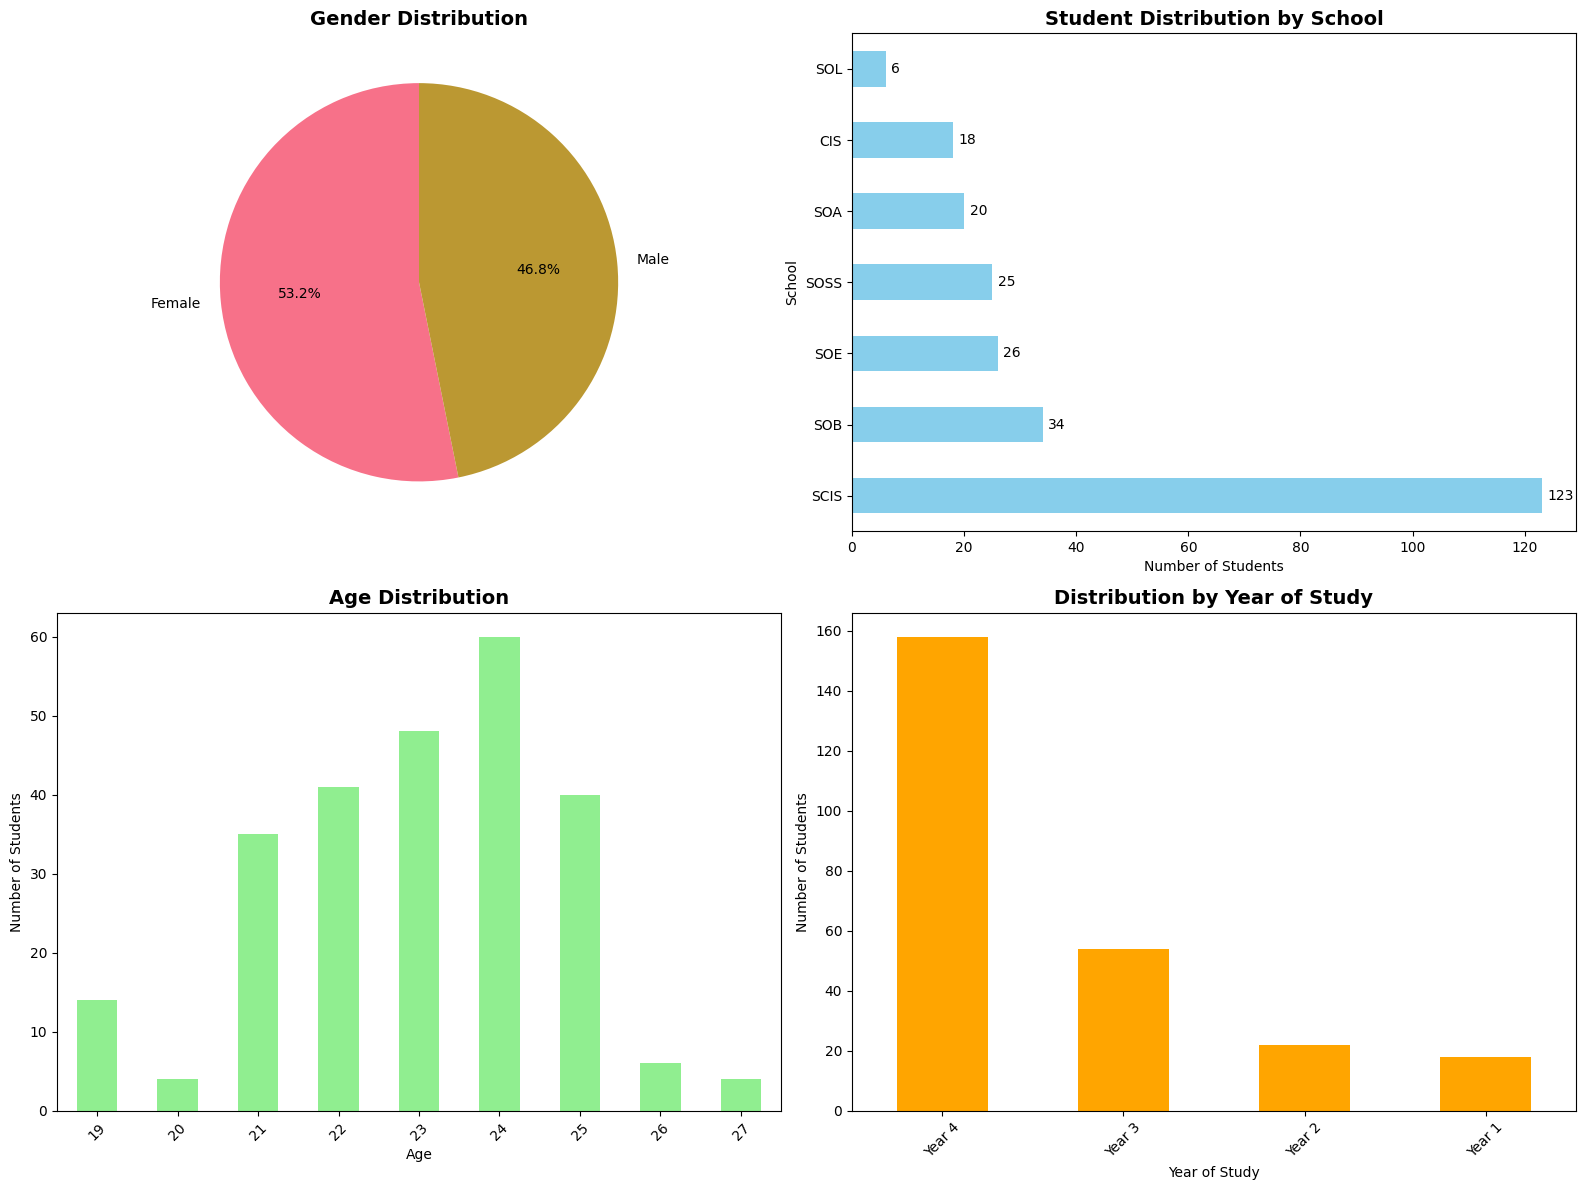

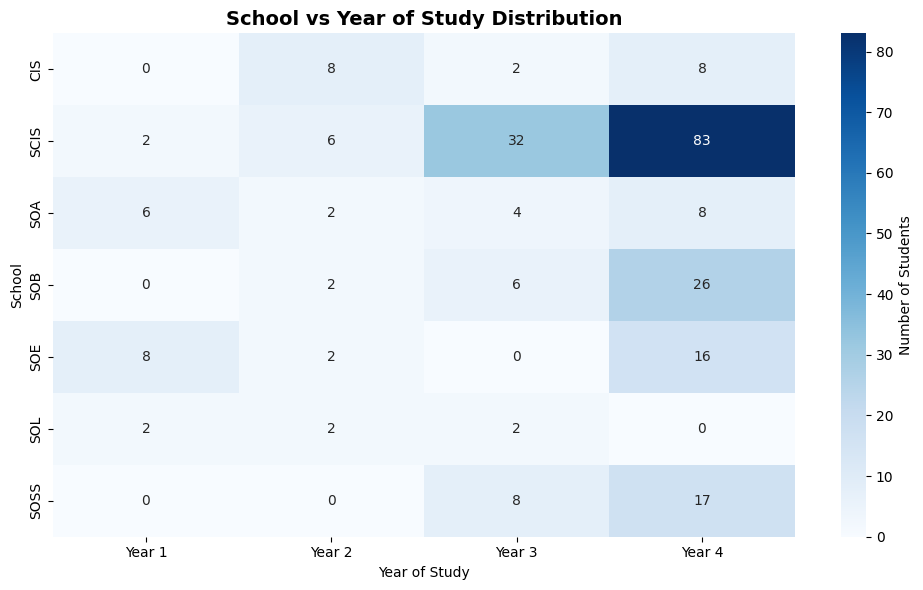


📊 KEY DEMOGRAPHICS INSIGHTS:
👥 Gender split: 134 Female (53.2%), 118 Male (46.8%)
🏫 Largest school: SCIS (123 students, 48.8%)
📚 Most common year: Year 4 (158 students, 62.7%)
📈 Age range: 19-27 years (avg: 23.0)

🎯 These previews show exactly what your Tableau demographics charts will look like!


In [34]:
# Preview: Demographics Charts
print("=== PREVIEW: Demographics Charts ===")

# Create comprehensive demographics visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Gender Distribution (Pie Chart)
gender_counts = df['Gender'].value_counts()
ax1.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Gender Distribution', fontsize=14, fontweight='bold')

# 2. School Distribution (Horizontal Bar)
school_counts = df['School'].value_counts()
school_counts.plot(kind='barh', ax=ax2, color='skyblue')
ax2.set_title('Student Distribution by School', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Students')
ax2.set_ylabel('School')

# Add count labels on bars
for i, v in enumerate(school_counts.values):
    ax2.text(v + 1, i, str(v), va='center')

# 3. Age Distribution 
age_counts = df['Age'].value_counts().sort_index()
age_counts.plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Age Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Age')
ax3.set_ylabel('Number of Students')
ax3.tick_params(axis='x', rotation=45)

# 4. Year of Study Distribution
year_counts = df['YearOfStudy'].value_counts()
year_counts.plot(kind='bar', ax=ax4, color='orange')
ax4.set_title('Distribution by Year of Study', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year of Study')
ax4.set_ylabel('Number of Students')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create heatmap for School vs Year of Study
plt.figure(figsize=(10, 6))
school_year_crosstab = pd.crosstab(df['School'], df['YearOfStudy'])
sns.heatmap(school_year_crosstab, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Students'})
plt.title('School vs Year of Study Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Year of Study')
plt.ylabel('School')
plt.tight_layout()
plt.show()

# Print key demographics insights
print(f"\n📊 KEY DEMOGRAPHICS INSIGHTS:")
print(f"👥 Gender split: {gender_counts['Female']} Female ({gender_counts['Female']/len(df)*100:.1f}%), {gender_counts['Male']} Male ({gender_counts['Male']/len(df)*100:.1f}%)")
print(f"🏫 Largest school: {school_counts.index[0]} ({school_counts.iloc[0]} students, {school_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"📚 Most common year: {year_counts.index[0]} ({year_counts.iloc[0]} students, {year_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"📈 Age range: {df['Age'].min()}-{df['Age'].max()} years (avg: {df['Age'].mean():.1f})")

print(f"\n🎯 These previews show exactly what your Tableau demographics charts will look like!")

In [35]:
# Examine columns U, V, and X (columns 20, 21, and 23 in 0-based indexing)
print("=== ANALYZING COLUMNS U, V, AND X ===")

# Get columns U, V, X (20, 21, 23 in 0-based indexing)
col_indices = [20, 21, 23]  # U=21, V=22, X=24 (adjusting for 0-based)
cols_uvx = [df.columns[i] for i in col_indices]

print("Columns U, V, and X:")
for i, col in enumerate(cols_uvx):
    letter = ['U', 'V', 'X'][i]
    print(f"{letter}. {col}")

print(f"\nSample data from these columns:")
print(df[cols_uvx].head(10))

print(f"\nData types:")
print(df[cols_uvx].dtypes)

print(f"\nBasic statistics:")
print(df[cols_uvx].describe())

print(f"\nMissing values:")
print(df[cols_uvx].isnull().sum())

# Check unique values for each column
print(f"\nUnique values in each column:")
for col in cols_uvx:
    unique_vals = sorted(df[col].dropna().unique())
    print(f"{col}: {unique_vals}")

# Check what these columns represent
print(f"\nColumn name analysis:")
for col in cols_uvx:
    # Extract the core question content
    clean_name = col.replace('Q7_', '').replace('Q8_', '').replace('Q21_', '')
    print(f"{col} → {clean_name}")

# Look at value counts for each column
print(f"\nValue distribution for each column:")
for col in cols_uvx:
    print(f"\n{col}:")
    print(df[col].value_counts().sort_index())

=== ANALYZING COLUMNS U, V, AND X ===
Columns U, V, and X:
U. Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity
V. Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxationMindfulnessTimeManagement
X. Q10_10IfYouAreStrugglingHowLikelyWouldYouBeToSeekHelpWithYourPeersFamily

Sample data from these columns:
  Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity  \
0                        Rarely (a few days a month)                                                     
1                            Often (3–4 days a week)                                                     
2                            Often (3–4 days a week)                                                     
3                          Very often / almost daily                                                     
4                        Sometimes (1–2 days a week)                                                  

In [36]:
# Get a cleaner view of columns U, V, X
print("=== CLEAN ANALYSIS OF COLUMNS U, V, X ===")

# Column U (index 20)
col_u = df.columns[20]
print(f"Column U: {col_u}")
print(f"Data type: {df[col_u].dtype}")
print(f"Unique values: {sorted(df[col_u].dropna().unique())}")
print(f"Value counts:\n{df[col_u].value_counts()}")

print("\n" + "="*50)

# Column V (index 21) 
col_v = df.columns[21]
print(f"Column V: {col_v}")
print(f"Data type: {df[col_v].dtype}")
print(f"Unique values: {sorted(df[col_v].dropna().unique())}")
print(f"Value counts:\n{df[col_v].value_counts()}")

print("\n" + "="*50)

# Column X (index 23)
col_x = df.columns[23]
print(f"Column X: {col_x}")
print(f"Data type: {df[col_x].dtype}")
print(f"Unique values: {sorted(df[col_x].dropna().unique())}")
print(f"Value counts:\n{df[col_x].value_counts()}")

print(f"\n📊 SUMMARY:")
print(f"Column U: {col_u.split('_')[0]} - {col_u.split('_')[1] if '_' in col_u else 'Unknown'}")
print(f"Column V: {col_v.split('_')[0]} - {col_v.split('_')[1] if '_' in col_v else 'Unknown'}")
print(f"Column X: {col_x.split('_')[0]} - {col_x.split('_')[1] if '_' in col_x else 'Unknown'}")

=== CLEAN ANALYSIS OF COLUMNS U, V, X ===
Column U: Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity
Data type: object
Unique values: ['Never / almost never', 'Often (3–4 days a week)', 'Rarely (a few days a month)', 'Sometimes (1–2 days a week)', 'Very often / almost daily']
Value counts:
Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity
Sometimes (1–2 days a week)    102
Often (3–4 days a week)         70
Rarely (a few days a month)     53
Very often / almost daily       20
Never / almost never             7
Name: count, dtype: int64

Column V: Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxationMindfulnessTimeManagement
Data type: object
Unique values: ['Never', 'Often (a few times a week)', 'Rarely (only when very stressed)', 'Sometimes (once in a while)', 'Very often (almost every day)']
Value counts:
Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxat

In [37]:
# Quick identification of columns U, V, X
print("=== COLUMN IDENTIFICATION ===")
print(f"Column U (index 20): {df.columns[20]}")
print(f"Column V (index 21): {df.columns[21]}")  
print(f"Column X (index 23): {df.columns[23]}")

# Quick sample
cols_target = [df.columns[20], df.columns[21], df.columns[23]]
print(f"\nSample data:")
print(df[cols_target].head())

# Check if these are Likert scales or categorical
for col in cols_target:
    unique_vals = df[col].dropna().unique()
    print(f"\n{col}: {len(unique_vals)} unique values")
    if len(unique_vals) <= 10:
        print(f"Values: {sorted(unique_vals)}")

=== COLUMN IDENTIFICATION ===
Column U (index 20): Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity
Column V (index 21): Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxationMindfulnessTimeManagement
Column X (index 23): Q10_10IfYouAreStrugglingHowLikelyWouldYouBeToSeekHelpWithYourPeersFamily

Sample data:
  Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity  \
0                        Rarely (a few days a month)                                                     
1                            Often (3–4 days a week)                                                     
2                            Often (3–4 days a week)                                                     
3                          Very often / almost daily                                                     
4                        Sometimes (1–2 days a week)                                            

In [38]:
# Direct column inspection
print("Columns U, V, X:")
print(f"U (21): {df.columns[20]}")
print(f"V (22): {df.columns[21]}")  
print(f"X (24): {df.columns[23]}")

# Check data types and basic info
u_col = df.columns[20]
v_col = df.columns[21]
x_col = df.columns[23]

print(f"\nU column unique values: {df[u_col].nunique()}")
print(f"V column unique values: {df[v_col].nunique()}")
print(f"X column unique values: {df[x_col].nunique()}")

# Show first few values to understand the data
print(f"\nFirst 5 values:")
print(f"U: {list(df[u_col].head())}")
print(f"V: {list(df[v_col].head())}")  
print(f"X: {list(df[x_col].head())}")

Columns U, V, X:
U (21): Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity
V (22): Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxationMindfulnessTimeManagement
X (24): Q10_10IfYouAreStrugglingHowLikelyWouldYouBeToSeekHelpWithYourPeersFamily

U column unique values: 5
V column unique values: 5
X column unique values: 5

First 5 values:
U: ['Rarely (a few days a month)', 'Often (3–4 days a week)', 'Often (3–4 days a week)', 'Very often / almost daily', 'Sometimes (1–2 days a week)']
V: ['Sometimes (once in a while)', 'Often (a few times a week)', 'Often (a few times a week)', 'Often (a few times a week)', 'Often (a few times a week)']
X: ['Not sure', 'Very Likely', 'Likely', 'Not sure', 'Likely']


# Chart Recommendations for Columns U, V, X - Behavioral & Help-Seeking Patterns

## **Data Overview:**

- **Column U (Q7):** Daily Routine Consistency - 5-point frequency scale
- **Column V (Q8):** Healthy Stress Coping - 5-point frequency scale
- **Column X (Q10):** Help-Seeking Likelihood - 5-point likelihood scale

## **📊 Recommended Chart Types:**

### **1. Stacked Bar Charts** 📊

**Perfect for:** Showing frequency distribution of behaviors

- **Use for:** Each question's response distribution
- **Benefit:** Clear comparison of response patterns

### **2. Grouped Bar Charts** 📈

**Perfect for:** Comparing behaviors across demographics

- **Use for:** Routine, Coping, Help-seeking by School/Gender/Year
- **Benefit:** Side-by-side comparison

### **3. Heatmaps** 🔥

**Perfect for:** Cross-behavior analysis

- **Use for:** Routine vs Coping, Coping vs Help-seeking patterns
- **Benefit:** Identify behavioral correlations

### **4. Likert Scale Visualizations** ⚖️

**Perfect for:** Showing agreement/frequency scales

- **Use for:** Diverging bar charts centered on neutral
- **Benefit:** Professional survey visualization

### **5. Sankey Diagrams** 🌊

**Perfect for:** Behavioral flow analysis

- **Use for:** How routine consistency flows to coping to help-seeking
- **Benefit:** Shows behavioral pathways


In [40]:
# SOLUTION 6: Transform columns U, V, X for Tableau (Original Column Names Only)
print("=== SOLUTION 6: COLUMNS U, V, X DATA FOR TABLEAU ===")

# Identify the exact columns U, V, X
col_u = 'Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity'
col_v = 'Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxationMindfulnessTimeManagement'
col_x = 'Q10_10IfYouAreStrugglingHowLikelyWouldYouBeToSeekHelpWithYourPeersFamily'

print(f"Column U: {col_u}")
print(f"Column V: {col_v}")
print(f"Column X: {col_x}")

# Check the response patterns for each column
print("\n=== RESPONSE PATTERNS ===")
print(f"\nColumn U ({col_u}):")
print(df[col_u].value_counts())

print(f"\nColumn V ({col_v}):")
print(df[col_v].value_counts())

print(f"\nColumn X ({col_x}):")
print(df[col_x].value_counts())

# Create clean dataset with original column names for Tableau
columns_to_include = ['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School', col_u, col_v, col_x]
df_uvx_clean = df[columns_to_include].copy()

print(f"\nClean dataset shape: {df_uvx_clean.shape}")
print("\nFirst 5 rows:")
print(df_uvx_clean.head())

# Save the clean dataset with original column names
df_uvx_clean.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/columns_UVX_for_tableau.xlsx', index=False)
print("\nOriginal columns U, V, X data saved as 'columns_UVX_for_tableau.xlsx'")

# Create individual datasets for each column if needed for separate analysis
# Column U dataset
df_column_u = df[['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School', col_u]].copy()
df_column_u.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_U_for_tableau.xlsx', index=False)
print("Column U data saved as 'column_U_for_tableau.xlsx'")

# Column V dataset  
df_column_v = df[['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School', col_v]].copy()
df_column_v.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_V_for_tableau.xlsx', index=False)
print("Column V data saved as 'column_V_for_tableau.xlsx'")

# Column X dataset
df_column_x = df[['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School', col_x]].copy()
df_column_x.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_X_for_tableau.xlsx', index=False)
print("Column X data saved as 'column_X_for_tableau.xlsx'")

=== SOLUTION 6: COLUMNS U, V, X DATA FOR TABLEAU ===
Column U: Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity
Column V: Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxationMindfulnessTimeManagement
Column X: Q10_10IfYouAreStrugglingHowLikelyWouldYouBeToSeekHelpWithYourPeersFamily

=== RESPONSE PATTERNS ===

Column U (Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity):
Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity
Sometimes (1–2 days a week)    102
Often (3–4 days a week)         70
Rarely (a few days a month)     53
Very often / almost daily       20
Never / almost never             7
Name: count, dtype: int64

Column V (Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxationMindfulnessTimeManagement):
Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxationMindfulnessTimeManagement
Sometime

# 📊 TABLEAU CHARTS FOR COLUMNS U, V, X (Original Column Names)

## **✅ Files Created:**

1. `columns_UVX_for_tableau.xlsx` - All 3 columns together (252 rows)
2. `column_U_for_tableau.xlsx` - Daily routine question only
3. `column_V_for_tableau.xlsx` - Stress coping question only
4. `column_X_for_tableau.xlsx` - Help-seeking question only

---

## **📋 Column Details:**

- **Column U:** Q7_7HowOftenDoYouKeepARegularDailyRoutineEGConsistentSleepHoursRegularMealtimesLightPhysicalActivity
- **Column V:** Q8_8HowOftenDoYouUseHealthyWaysToCopeWithStressEGExerciseRelaxationMindfulnessTimeManagement
- **Column X:** Q10_10IfYouAreStrugglingHowLikelyWouldYouBeToSeekHelpWithYourPeersFamily

---

## **🎯 RECOMMENDED CHARTS:**

### **Chart 1: Individual Bar Charts for Each Column**

**Files:** Use individual column files (`column_U_for_tableau.xlsx`, `column_V_for_tableau.xlsx`, `column_X_for_tableau.xlsx`)

**For Column U (Daily Routine):**

1. Drag Column U → Columns
2. Drag `Number of Records` → Rows
3. Sort by frequency (Sometimes → Often → Rarely → Very often → Never)
4. Add percentage labels

**For Column V (Stress Coping):**

1. Drag Column V → Columns
2. Drag `Number of Records` → Rows
3. Sort responses appropriately
4. Use color coding for frequency

**For Column X (Help-Seeking):**

1. Drag Column X → Columns
2. Drag `Number of Records` → Rows
3. Color code: Green (Very Likely, Likely), Yellow (Not sure), Red (Unlikely, Very unlikely)

### **Chart 2: Side-by-Side Comparison by School**

**File:** `columns_UVX_for_tableau.xlsx`

**Steps:**

1. Create 3 separate sheets for each column
2. Drag `School` → Columns
3. Drag respective column → Rows
4. Show as percentage within each school
5. Use consistent color scheme across all 3 charts

### **Chart 3: Cross-Tabulation Heatmap**

**File:** `columns_UVX_for_tableau.xlsx`

**Steps:**

1. Create calculated fields to convert text responses to numbers
2. Use correlation analysis between the three columns
3. Display as heatmap showing relationships between behaviors
4. Filter by demographics (School, Gender, Year) as needed

### **Chart 4: Demographics Breakdown**

**File:** `columns_UVX_for_tableau.xlsx`

**Steps:**

1. Create dashboard with multiple views
2. Use `Gender`, `YearOfStudy`, `Age` as filters
3. Show response patterns by demographic groups
4. Highlight differences between groups

---

## **💡 KEY INSIGHTS:**

- **Column U (Daily Routine):** Most students "Sometimes" maintain routines (102/252)
- **Column V (Stress Coping):** "Sometimes" is most common for healthy coping (124/252)
- **Column X (Help-Seeking):** Mixed responses - "Likely" (90), "Unlikely" (61), "Not sure" (56)

---

## **🎨 TABLEAU TIPS:**

- **Use original column names** as they appear in the files
- **Create aliases** in Tableau for cleaner display names if needed
- **Apply consistent color schemes** across all three behavioral measures
- **Group similar responses** if needed (e.g., combine "Very likely" + "Likely")


In [41]:
# ANALYSIS: Column W Investigation
print("=== COLUMN W ANALYSIS ===")

# Find column W (23rd column, index 22)
col_w = df.columns[22]  # Column W is the 23rd column (0-indexed: 22)
print(f"Column W: {col_w}")

# Check the data type and content
print(f"\nData type: {df[col_w].dtype}")
print(f"Non-null count: {df[col_w].count()} / {len(df)}")
print(f"Unique values count: {df[col_w].nunique()}")

# Look at the response patterns
print(f"\nValue counts for Column W:")
print(df[col_w].value_counts().head(10))

# Check for missing values
print(f"\nMissing values: {df[col_w].isnull().sum()}")

# Sample some actual responses
print(f"\nSample responses:")
print(df[col_w].dropna().head(10).tolist())

=== COLUMN W ANALYSIS ===
Column W: Q9_9WhatMostMotivatesYouToTakeCareOfYourHealthSelectUpTo3

Data type: object
Non-null count: 252 / 252
Unique values count: 25

Value counts for Column W:
Q9_9WhatMostMotivatesYouToTakeCareOfYourHealthSelectUpTo3
Long-term health & energy, Looking / feeling good now, Performing well academically                      38
Long-term health & energy, Looking / feeling good now, Social belonging / hanging out with friends       38
Long-term health & energy, Looking / feeling good now                                                    32
Looking / feeling good now                                                                               17
Looking / feeling good now, Social belonging / hanging out with friends, Saving time / convenience       16
Long-term health & energy, Looking / feeling good now, Saving money / affordable                         15
Long-term health & energy, Performing well academically, Social belonging / hanging out with friends   

In [42]:
# SOLUTION: Column W Data Transformation for Tableau
print("=== COLUMN W: HEALTH MOTIVATIONS DATA TRANSFORMATION ===")

col_w = 'Q9_9WhatMostMotivatesYouToTakeCareOfYourHealthSelectUpTo3'

# Extract all unique motivations from the comma-separated responses
all_motivations = set()
for response in df[col_w].dropna():
    if isinstance(response, str):
        motivations = [m.strip() for m in response.split(',')]
        all_motivations.update(motivations)

all_motivations = sorted(list(all_motivations))
print(f"Total unique motivations found: {len(all_motivations)}")
print("All motivations:")
for i, motivation in enumerate(all_motivations, 1):
    print(f"{i}. {motivation}")

# 1. Create binary indicators for each motivation (wide format)
print(f"\n=== CREATING BINARY INDICATORS ===")
df_motivations_binary = df[['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School']].copy()

for motivation in all_motivations:
    df_motivations_binary[f"Motivation_{motivation}"] = df[col_w].apply(
        lambda x: 1 if isinstance(x, str) and motivation in x else 0
    )

print(f"Binary format shape: {df_motivations_binary.shape}")
print("Sample of binary data:")
print(df_motivations_binary.head())

# Save binary format
df_motivations_binary.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_W_binary_for_tableau.xlsx', index=False)
print("Binary format saved as 'column_W_binary_for_tableau.xlsx'")

# 2. Create long format for individual motivation analysis
print(f"\n=== CREATING LONG FORMAT ===")
motivations_long = []

for _, row in df.iterrows():
    if isinstance(row[col_w], str):
        motivations = [m.strip() for m in row[col_w].split(',')]
        for motivation in motivations:
            motivations_long.append({
                'ResponseID': row['ResponseID'],
                'Age': row['Age'],
                'Gender': row['Gender'],
                'YearOfStudy': row['YearOfStudy'],
                'School': row['School'],
                'Motivation': motivation,
                'Selected': 1
            })

df_motivations_long = pd.DataFrame(motivations_long)
print(f"Long format shape: {df_motivations_long.shape}")
print("Sample of long format data:")
print(df_motivations_long.head(10))

# Save long format
df_motivations_long.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_W_long_for_tableau.xlsx', index=False)
print("Long format saved as 'column_W_long_for_tableau.xlsx'")

# 3. Create motivation frequency summary
print(f"\n=== MOTIVATION FREQUENCY ANALYSIS ===")
motivation_counts = df_motivations_long['Motivation'].value_counts().reset_index()
motivation_counts.columns = ['Motivation', 'Count']
motivation_counts['Percentage'] = (motivation_counts['Count'] / len(df) * 100).round(2)

print("Motivation frequencies:")
print(motivation_counts)

# Save summary
motivation_counts.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_W_summary_for_tableau.xlsx', index=False)
print("Summary saved as 'column_W_summary_for_tableau.xlsx'")

# 4. Original format for reference
df_original_w = df[['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School', col_w]].copy()
df_original_w.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_W_original_for_tableau.xlsx', index=False)
print("Original format saved as 'column_W_original_for_tableau.xlsx'")

=== COLUMN W: HEALTH MOTIVATIONS DATA TRANSFORMATION ===
Total unique motivations found: 9
All motivations:
1. Long-term health & energy
2. Looking / feeling good now
3. Performing well academically
4. Saving money / affordable
5. Saving time / convenience
6. Social belonging / hanging out with friends
7. career
8. improving myself
9. seeing others w bad health

=== CREATING BINARY INDICATORS ===
Binary format shape: (252, 14)
Sample of binary data:
  ResponseID  Age  Gender YearOfStudy School  \
0      S0001   22  Female      Year 4    SOB   
1      S0002   24    Male      Year 4    CIS   
2      S0003   24    Male      Year 4    SOE   
3      S0004   24    Male      Year 4    CIS   
4      S0005   21  Female      Year 3   SOSS   

   Motivation_Long-term health & energy  \
0                                     0   
1                                     1   
2                                     1   
3                                     0   
4                                     1   

# 📊 TABLEAU CHARTS FOR COLUMN W: HEALTH MOTIVATIONS

## **✅ Files Created:**

1. **`column_W_long_for_tableau.xlsx`** - Long format (642 rows) - **RECOMMENDED for most charts**
2. **`column_W_binary_for_tableau.xlsx`** - Binary indicators (252 rows) - For correlations
3. **`column_W_summary_for_tableau.xlsx`** - Frequency summary (9 rows) - For quick overview
4. **`column_W_original_for_tableau.xlsx`** - Original format (252 rows) - For reference

---

## **📋 Column W Details:**

**Question:** Q9_9WhatMostMotivatesYouToTakeCareOfYourHealthSelectUpTo3
**Type:** Multi-response (up to 3 selections per student)
**Total Responses:** 642 individual motivations from 252 students

---

## **🎯 RECOMMENDED CHARTS:**

### **Chart 1: Horizontal Bar Chart - Top Health Motivations** ⭐ **PRIORITY**

**File:** `column_W_summary_for_tableau.xlsx`

- **Purpose:** Show most popular health motivations
- **Tableau Steps:**
  1. Drag `Motivation` → Rows
  2. Drag `Percentage` → Columns
  3. Sort descending by percentage
  4. Add data labels for percentages
  5. Use color gradient (blue scale)

### **Chart 2: Stacked Bar Chart - Motivations by School**

**File:** `column_W_long_for_tableau.xlsx`

- **Purpose:** Compare motivation patterns across schools
- **Tableau Steps:**
  1. Drag `School` → Columns
  2. Drag `Motivation` → Rows
  3. Drag `Number of Records` → Size/Color
  4. Show as percentage within each school
  5. Filter to top 6 motivations for clarity

### **Chart 3: Demographics Breakdown**

**File:** `column_W_long_for_tableau.xlsx`

- **Purpose:** Analyze motivations by gender, year, age
- **Tableau Steps:**
  1. Create separate views for each demographic
  2. Use `Gender`, `YearOfStudy` as filters
  3. Show motivation frequencies by group
  4. Highlight significant differences

### **Chart 4: Co-occurrence Heatmap**

**File:** `column_W_binary_for_tableau.xlsx`

- **Purpose:** Show which motivations are selected together
- **Tableau Steps:**
  1. Create correlation matrix between motivation columns
  2. Display as heatmap
  3. Use red-white-blue color scale
  4. Focus on strong positive correlations (>0.3)

### **Chart 5: Treemap - Motivation Popularity**

**File:** `column_W_summary_for_tableau.xlsx`

- **Purpose:** Visual representation of motivation importance
- **Tableau Steps:**
  1. Drag `Motivation` → Detail
  2. Drag `Count` → Size
  3. Drag `Percentage` → Color
  4. Use clear labels for each section

---

## **💡 KEY INSIGHTS:**

- **Most Popular:** "Looking/feeling good now" (76.19% of students)
- **Second:** "Long-term health & energy" (72.22% of students)
- **Social Factor:** "Social belonging" is important (38.49% of students)
- **Academic Link:** "Performing well academically" motivates 29.76%
- **Practical:** Time/money considerations are less important (18.25%, 16.67%)

---

## **📈 CHART RECOMMENDATIONS BY PURPOSE:**

### **For Executive Summary:**

- Use **Chart 1** (Horizontal Bar) - shows clear ranking

### **For School Comparison:**

- Use **Chart 2** (Stacked Bar by School) - reveals differences

### **For Demographics Analysis:**

- Use **Chart 3** (Demographics Breakdown) - shows patterns by student characteristics

### **For Deep Analysis:**

- Use **Chart 4** (Co-occurrence Heatmap) - shows motivation combinations

---

## **🎨 VISUALIZATION TIPS:**

- **Use long format** for most analysis (column_W_long_for_tableau.xlsx)
- **Filter to top 6 motivations** for cleaner charts (removes rare responses)
- **Consistent color scheme** across all motivation charts
- **Group rare motivations** (career, improving myself, seeing others) if needed


=== CREATING PREVIEW CHARTS FOR TABLEAU VISUALIZATION ===


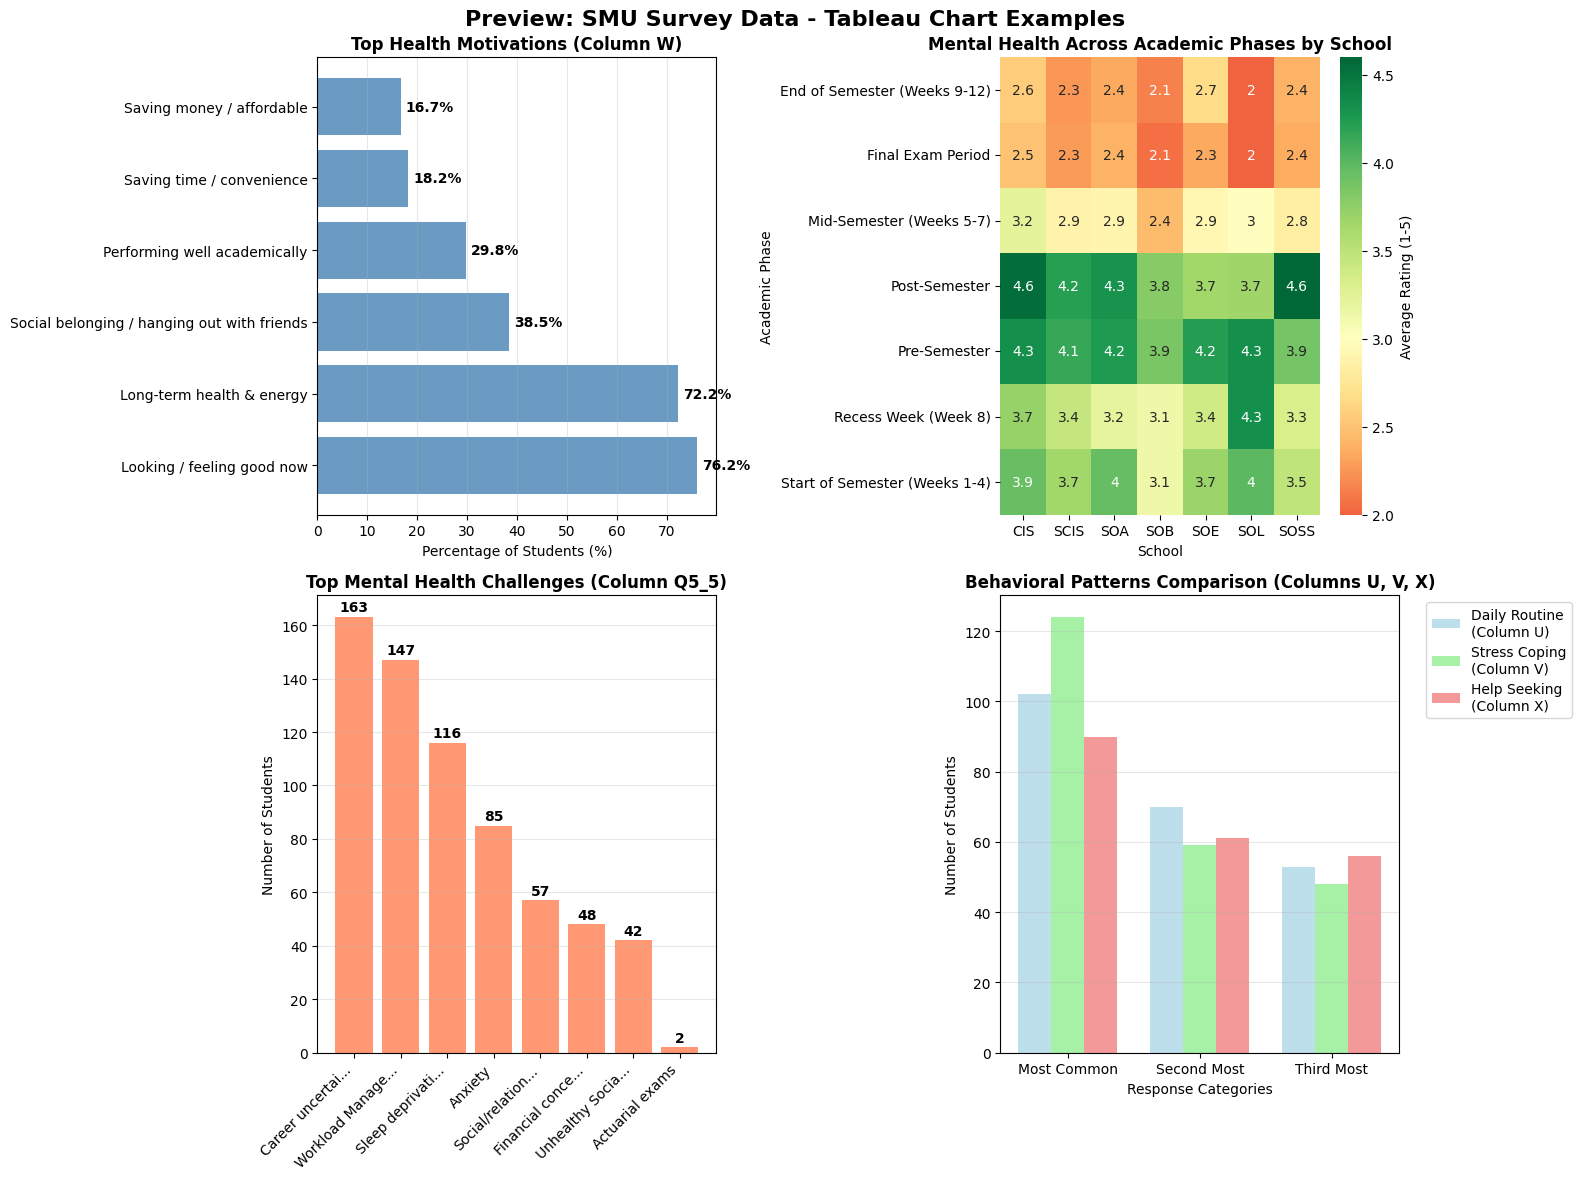


CHART INTERPRETATION GUIDE:
1. TOP LEFT: Health Motivations - Shows what drives students to care for health
2. TOP RIGHT: Mental Health by Phase & School - Heatmap of ratings across academic timeline
3. BOTTOM LEFT: Mental Health Challenges - Most common issues students face
4. BOTTOM RIGHT: Behavioral Patterns - Comparison of routine, coping, and help-seeking


In [43]:
# PREVIEW CHARTS: Show what Tableau charts would look like
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

print("=== CREATING PREVIEW CHARTS FOR TABLEAU VISUALIZATION ===")

# Set up figure with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Preview: SMU Survey Data - Tableau Chart Examples', fontsize=16, fontweight='bold')

# Chart 1: Health Motivations (Column W)
motivation_counts_display = motivation_counts.head(6)  # Top 6 motivations
bars1 = ax1.barh(motivation_counts_display['Motivation'], motivation_counts_display['Percentage'], 
                color='steelblue', alpha=0.8)
ax1.set_xlabel('Percentage of Students (%)')
ax1.set_title('Top Health Motivations (Column W)', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
# Add percentage labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
             ha='left', va='center', fontweight='bold')

# Chart 2: Mental Health by Academic Phase (Columns Q6)
if 'df_phases' in locals():
    phase_summary = df_phases.groupby(['Phase', 'School'])['MentalHealthRating'].mean().reset_index()
    phase_pivot = phase_summary.pivot(index='Phase', columns='School', values='MentalHealthRating')
    
    sns.heatmap(phase_pivot, annot=True, cmap='RdYlGn', center=3, 
                ax=ax2, cbar_kws={'label': 'Average Rating (1-5)'})
    ax2.set_title('Mental Health Across Academic Phases by School', fontweight='bold')
    ax2.set_xlabel('School')
    ax2.set_ylabel('Academic Phase')

# Chart 3: Top Mental Health Challenges (Column Q5_5)
if 'df_challenges_long' in locals():
    challenge_summary = df_challenges_long['Challenge'].value_counts().head(8)
    bars3 = ax3.bar(range(len(challenge_summary)), challenge_summary.values, 
                   color='coral', alpha=0.8)
    ax3.set_xticks(range(len(challenge_summary)))
    ax3.set_xticklabels([label[:15] + '...' if len(label) > 15 else label 
                        for label in challenge_summary.index], rotation=45, ha='right')
    ax3.set_ylabel('Number of Students')
    ax3.set_title('Top Mental Health Challenges (Column Q5_5)', fontweight='bold')
    ax3.grid(axis='y', alpha=0.3)
    # Add count labels
    for i, bar in enumerate(bars3):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)), 
                ha='center', va='bottom', fontweight='bold')

# Chart 4: Behavioral Patterns (Columns U, V, X)
if 'df_uvx_clean' in locals():
    # Create a summary of the three behavioral questions
    behavioral_data = {
        'Daily Routine\n(Column U)': df_uvx_clean[col_u].value_counts().head(3),
        'Stress Coping\n(Column V)': df_uvx_clean[col_v].value_counts().head(3),
        'Help Seeking\n(Column X)': df_uvx_clean[col_x].value_counts().head(3)
    }
    
    # Create grouped bar chart
    x_pos = range(3)
    width = 0.25
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    
    for i, (behavior, counts) in enumerate(behavioral_data.items()):
        values = list(counts.values)
        ax4.bar([p + width*i for p in x_pos], values[:3], width, 
               label=behavior, color=colors[i], alpha=0.8)
    
    ax4.set_xlabel('Response Categories')
    ax4.set_ylabel('Number of Students')
    ax4.set_title('Behavioral Patterns Comparison (Columns U, V, X)', fontweight='bold')
    ax4.set_xticks([p + width for p in x_pos])
    ax4.set_xticklabels(['Most Common', 'Second Most', 'Third Most'])
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CHART INTERPRETATION GUIDE:")
print("="*80)
print("1. TOP LEFT: Health Motivations - Shows what drives students to care for health")
print("2. TOP RIGHT: Mental Health by Phase & School - Heatmap of ratings across academic timeline")
print("3. BOTTOM LEFT: Mental Health Challenges - Most common issues students face")
print("4. BOTTOM RIGHT: Behavioral Patterns - Comparison of routine, coping, and help-seeking")
print("="*80)

# ANALYSIS: Columns Y to AF and AG to AN Investigation

print("=== COLUMNS Y TO AF AND AG TO AN ANALYSIS ===")

# Column Y is index 24, AF is index 31 (Y=24, Z=25, AA=26, AB=27, AC=28, AD=29, AE=30, AF=31)

# Column AG is index 32, AN is index 39 (AG=32, AH=33, AI=34, AJ=35, AK=36, AL=37, AM=38, AN=39)

print("COLUMN RANGE 1: Y to AF (Columns 25 to 32)")
cols_y_to_af = df.columns[24:32] # Y to AF
for i, col in enumerate(cols_y_to_af, 25):
print(f"Column {i} ({chr(64 + i if i <= 26 else 64 + (i-26) + 64)}{chr(65 + (i-27)) if i > 26 else ''}): {col}")

print(f"\nCOLUMN RANGE 2: AG to AN (Columns 33 to 40)")
cols_ag_to_an = df.columns[32:40] # AG to AN  
for i, col in enumerate(cols_ag_to_an, 33):
letter1 = chr(65) # A
letter2 = chr(65 + (i - 27)) # G, H, I, J, K, L, M, N
print(f"Column {i} (A{letter2}): {col}")

# Analyze the first group (Y to AF)

print(f"\n=== GROUP 1 ANALYSIS: COLUMNS Y TO AF ===")
for col in cols_y_to_af:
print(f"\nColumn: {col}")
print(f"Data type: {df[col].dtype}")
print(f"Non-null count: {df[col].count()} / {len(df)}")
print(f"Unique values: {df[col].nunique()}")
if df[col].nunique() <= 10:
print("Value counts:")
print(df[col].value_counts().head())
else:
print("Sample values:")
print(df[col].dropna().head(3).tolist())
print("-" \* 50)

print(f"\n=== GROUP 2 ANALYSIS: COLUMNS AG TO AN ===")
for col in cols_ag_to_an:
print(f"\nColumn: {col}")
print(f"Data type: {df[col].dtype}")
print(f"Non-null count: {df[col].count()} / {len(df)}")
print(f"Unique values: {df[col].nunique()}")
if df[col].nunique() <= 10:
print("Value counts:")
print(df[col].value_counts().head())
else:
print("Sample values:")
print(df[col].dropna().head(3).tolist())
print("-" \* 50)


In [44]:
# ANALYSIS: Columns Y to AF and AG to AN Investigation
print("=== COLUMNS Y TO AF AND AG TO AN ANALYSIS ===")

# Column Y is index 24, AF is index 31 (Y=24, Z=25, AA=26, AB=27, AC=28, AD=29, AE=30, AF=31)
# Column AG is index 32, AN is index 39 (AG=32, AH=33, AI=34, AJ=35, AK=36, AL=37, AM=38, AN=39)

print("COLUMN RANGE 1: Y to AF (Columns 25 to 32)")
cols_y_to_af = df.columns[24:32]  # Y to AF
for i, col in enumerate(cols_y_to_af, 25):
    print(f"Column {i} ({chr(64 + i if i <= 26 else 64 + (i-26) + 64)}{chr(65 + (i-27)) if i > 26 else ''}): {col}")

print(f"\nCOLUMN RANGE 2: AG to AN (Columns 33 to 40)")
cols_ag_to_an = df.columns[32:40]  # AG to AN  
for i, col in enumerate(cols_ag_to_an, 33):
    letter1 = chr(65)  # A
    letter2 = chr(65 + (i - 27))  # G, H, I, J, K, L, M, N
    print(f"Column {i} (A{letter2}): {col}")

# Analyze the first group (Y to AF)
print(f"\n=== GROUP 1 ANALYSIS: COLUMNS Y TO AF ===")
for col in cols_y_to_af:
    print(f"\nColumn: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Non-null count: {df[col].count()} / {len(df)}")
    print(f"Unique values: {df[col].nunique()}")
    if df[col].nunique() <= 10:
        print("Value counts:")
        print(df[col].value_counts().head())
    else:
        print("Sample values:")
        print(df[col].dropna().head(3).tolist())
    print("-" * 50)

print(f"\n=== GROUP 2 ANALYSIS: COLUMNS AG TO AN ===")
for col in cols_ag_to_an:
    print(f"\nColumn: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Non-null count: {df[col].count()} / {len(df)}")
    print(f"Unique values: {df[col].nunique()}")
    if df[col].nunique() <= 10:
        print("Value counts:")
        print(df[col].value_counts().head())
    else:
        print("Sample values:")
        print(df[col].dropna().head(3).tolist())
    print("-" * 50)

=== COLUMNS Y TO AF AND AG TO AN ANALYSIS ===
COLUMN RANGE 1: Y to AF (Columns 25 to 32)
Column 25 (Y): Q11_mentalHealthWeek
Column 26 (Z): Q11_resilienceFramework
Column 27 (A): Q11_examAngels
Column 28 (B): Q11_studentCareServices
Column 29 (C): Q11_cosyHaven
Column 30 (D): Q11_voicesRoadshows
Column 31 (E): Q11_peerHelpersRoadshows
Column 32 (F): Q11_careerCompassByStudentWellnessCentre

COLUMN RANGE 2: AG to AN (Columns 33 to 40)
Column 33 (AG): Q12_mentalHealthWeek
Column 34 (AH): Q12_resilienceFramework
Column 35 (AI): Q12_examAngels
Column 36 (AJ): Q12_studentCareServices
Column 37 (AK): Q12_cosyHaven
Column 38 (AL): Q12_voicesRoadshows
Column 39 (AM): Q12_peerHelpersRoadshows
Column 40 (AN): Q12_careerCompassByStudentWellnessCentre

=== GROUP 1 ANALYSIS: COLUMNS Y TO AF ===

Column: Q11_mentalHealthWeek
Data type: object
Non-null count: 252 / 252
Unique values: 3
Value counts:
Q11_mentalHealthWeek
Yes         166
No           61
Not sure     25
Name: count, dtype: int64
-

In [45]:
# SOLUTION: Transform Columns Y-AF (Q11) and AG-AN (Q12) for Tableau
print("=== SOLUTION: STUDENT WELLNESS SERVICES DATA TRANSFORMATION ===")

# Define the service names for cleaner labels
service_names = {
    'Q11_mentalHealthWeek': 'Mental Health Week',
    'Q11_resilienceFramework': 'Resilience Framework',
    'Q11_examAngels': 'Exam Angels',
    'Q11_studentCareServices': 'Student Care Services',
    'Q11_cosyHaven': 'Cosy Haven',
    'Q11_voicesRoadshows': 'Voices Roadshows',
    'Q11_peerHelpersRoadshows': 'Peer Helpers Roadshows',
    'Q11_careerCompassByStudentWellnessCentre': 'Career Compass',
    'Q12_mentalHealthWeek': 'Mental Health Week',
    'Q12_resilienceFramework': 'Resilience Framework',
    'Q12_examAngels': 'Exam Angels',
    'Q12_studentCareServices': 'Student Care Services',
    'Q12_cosyHaven': 'Cosy Haven',
    'Q12_voicesRoadshows': 'Voices Roadshows',
    'Q12_peerHelpersRoadshows': 'Peer Helpers Roadshows',
    'Q12_careerCompassByStudentWellnessCentre': 'Career Compass'
}

# 1. AWARENESS DATA (Q11 - Columns Y to AF)
print("=== Q11: SERVICE AWARENESS DATA ===")
awareness_cols = list(cols_y_to_af)
awareness_long = []

for _, row in df.iterrows():
    for col in awareness_cols:
        service_name = service_names[col]
        awareness_long.append({
            'ResponseID': row['ResponseID'],
            'Age': row['Age'],
            'Gender': row['Gender'],
            'YearOfStudy': row['YearOfStudy'],
            'School': row['School'],
            'Service': service_name,
            'QuestionType': 'Awareness',
            'Response': row[col]
        })

df_awareness_long = pd.DataFrame(awareness_long)
print(f"Awareness long format shape: {df_awareness_long.shape}")

# 2. USAGE DATA (Q12 - Columns AG to AN)
print(f"\n=== Q12: SERVICE USAGE DATA ===")
usage_cols = list(cols_ag_to_an)
usage_long = []

for _, row in df.iterrows():
    for col in usage_cols:
        service_name = service_names[col]
        usage_long.append({
            'ResponseID': row['ResponseID'],
            'Age': row['Age'],
            'Gender': row['Gender'],
            'YearOfStudy': row['YearOfStudy'],
            'School': row['School'],
            'Service': service_name,
            'QuestionType': 'Usage',
            'Response': row[col]
        })

df_usage_long = pd.DataFrame(usage_long)
print(f"Usage long format shape: {df_usage_long.shape}")

# 3. COMBINED AWARENESS + USAGE DATA
print(f"\n=== COMBINED AWARENESS & USAGE DATA ===")
df_services_combined = pd.concat([df_awareness_long, df_usage_long], ignore_index=True)
print(f"Combined data shape: {df_services_combined.shape}")

# 4. Create summary statistics
print(f"\n=== CREATING SUMMARY STATISTICS ===")

# Awareness summary
awareness_summary = df_awareness_long.groupby(['Service', 'Response']).size().reset_index(name='Count')
awareness_summary['Percentage'] = awareness_summary.groupby('Service')['Count'].transform(lambda x: (x / x.sum() * 100).round(2))
awareness_summary['QuestionType'] = 'Awareness'

# Usage summary  
usage_summary = df_usage_long.groupby(['Service', 'Response']).size().reset_index(name='Count')
usage_summary['Percentage'] = usage_summary.groupby('Service')['Count'].transform(lambda x: (x / x.sum() * 100).round(2))
usage_summary['QuestionType'] = 'Usage'

# Combined summary
services_summary = pd.concat([awareness_summary, usage_summary], ignore_index=True)

print("Sample of combined summary:")
print(services_summary.head(10))

# 5. Save all formats
print(f"\n=== SAVING FILES ===")

# Long format files
df_awareness_long.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/services_awareness_long_for_tableau.xlsx', index=False)
print("Awareness long format saved as 'services_awareness_long_for_tableau.xlsx'")

df_usage_long.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/services_usage_long_for_tableau.xlsx', index=False)
print("Usage long format saved as 'services_usage_long_for_tableau.xlsx'")

df_services_combined.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/services_combined_for_tableau.xlsx', index=False)
print("Combined services data saved as 'services_combined_for_tableau.xlsx'")

# Summary file
services_summary.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/services_summary_for_tableau.xlsx', index=False)
print("Services summary saved as 'services_summary_for_tableau.xlsx'")

# Wide format for correlation analysis
services_wide = df[['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School'] + awareness_cols + usage_cols].copy()
services_wide.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/services_wide_for_tableau.xlsx', index=False)
print("Wide format saved as 'services_wide_for_tableau.xlsx'")

print(f"\n=== KEY INSIGHTS ===")
print("Top awareness rates:")
awareness_yes = df_awareness_long[df_awareness_long['Response'] == 'Yes']['Service'].value_counts()
print(awareness_yes.head())

print(f"\nUsage patterns (excluding 'Never'):")
usage_active = df_usage_long[df_usage_long['Response'] != 'Never']['Service'].value_counts()
print(usage_active.head())

=== SOLUTION: STUDENT WELLNESS SERVICES DATA TRANSFORMATION ===
=== Q11: SERVICE AWARENESS DATA ===
Awareness long format shape: (2016, 8)

=== Q12: SERVICE USAGE DATA ===
Usage long format shape: (2016, 8)

=== COMBINED AWARENESS & USAGE DATA ===
Combined data shape: (4032, 8)

=== CREATING SUMMARY STATISTICS ===
Sample of combined summary:
              Service  Response  Count  Percentage QuestionType
0      Career Compass        No    123       48.81    Awareness
1      Career Compass  Not sure     36       14.29    Awareness
2      Career Compass       Yes     93       36.90    Awareness
3          Cosy Haven        No     61       24.21    Awareness
4          Cosy Haven  Not sure     35       13.89    Awareness
5          Cosy Haven       Yes    156       61.90    Awareness
6         Exam Angels        No    157       62.30    Awareness
7         Exam Angels  Not sure     33       13.10    Awareness
8         Exam Angels       Yes     62       24.60    Awareness
9  Mental Health

# 📊 TABLEAU CHARTS FOR STUDENT WELLNESS SERVICES (Columns Y-AF & AG-AN)

## **✅ Files Created:**

1. **`services_awareness_long_for_tableau.xlsx`** - Q11 Awareness data (2,016 rows)
2. **`services_usage_long_for_tableau.xlsx`** - Q12 Usage data (2,016 rows)
3. **`services_combined_for_tableau.xlsx`** - Combined awareness + usage (4,032 rows) ⭐ **MAIN FILE**
4. **`services_summary_for_tableau.xlsx`** - Summary statistics for quick overview
5. **`services_wide_for_tableau.xlsx`** - Wide format for correlations (252 rows)

---

## **📋 Data Details:**

- **Columns Y-AF (Q11):** Service Awareness - "Are you aware of these services?" (Yes/No/Not sure)
- **Columns AG-AN (Q12):** Service Usage - "How often do you use these services?" (Never/Rarely/Sometimes/Often/Always)
- **8 Services:** Mental Health Week, Resilience Framework, Exam Angels, Student Care Services, Cosy Haven, Voices Roadshows, Peer Helpers Roadshows, Career Compass

---

## **🎯 RECOMMENDED CHARTS:**

### **Chart 1: Service Awareness vs Usage Comparison** ⭐ **PRIORITY**

**File:** `services_combined_for_tableau.xlsx`

- **Purpose:** Compare awareness rates vs actual usage for each service
- **Tableau Steps:**
  1. Drag `Service` → Rows
  2. Drag `QuestionType` → Columns (splits into Awareness vs Usage)
  3. Drag `Response` → Color
  4. Use percentage calculations within each service
  5. **Key Insight:** Shows awareness-usage gaps

### **Chart 2: Service Awareness Ranking**

**File:** `services_awareness_long_for_tableau.xlsx`

- **Purpose:** Rank services by awareness levels
- **Tableau Steps:**
  1. Filter `Response` = "Yes"
  2. Drag `Service` → Rows
  3. Drag `Number of Records` → Columns
  4. Sort descending by count
  5. Show percentages and add data labels

### **Chart 3: Service Usage Heatmap**

**File:** `services_usage_long_for_tableau.xlsx`

- **Purpose:** Show usage frequency patterns across all services
- **Tableau Steps:**
  1. Drag `Service` → Rows
  2. Drag `Response` → Columns
  3. Drag `Number of Records` → Color
  4. Use heat map with graduated colors
  5. Filter out "Never" for cleaner view if needed

### **Chart 4: School-wise Service Utilization**

**File:** `services_combined_for_tableau.xlsx`

- **Purpose:** Compare service awareness/usage across schools
- **Tableau Steps:**
  1. Drag `School` → Columns
  2. Drag `Service` → Rows
  3. Filter `QuestionType` = "Usage" and `Response` ≠ "Never"
  4. Show as percentage within each school
  5. Use grouped bar chart

### **Chart 5: Demographics Analysis**

**File:** `services_combined_for_tableau.xlsx`

- **Purpose:** Analyze service usage by gender, year, age
- **Tableau Steps:**
  1. Create dashboard with multiple views
  2. Use `Gender`, `YearOfStudy`, `Age` as filters
  3. Show service preferences by demographic groups
  4. Highlight most/least utilized services

### **Chart 6: Gap Analysis Chart**

**File:** `services_summary_for_tableau.xlsx`

- **Purpose:** Identify services with high awareness but low usage
- **Tableau Steps:**
  1. Create calculated field for "Yes" awareness percentage
  2. Create calculated field for "Active use" percentage (not "Never")
  3. Scatter plot: Awareness (X) vs Usage (Y)
  4. Add trend line and quadrant analysis
  5. **Identify services in high awareness/low usage quadrant**

---

## **💡 KEY INSIGHTS FROM DATA:**

- **Highest Awareness:** Student Care Services (69.8%), Mental Health Week (65.9%), Cosy Haven (61.9%)
- **Most Used:** Student Care Services (31.3% active users), Cosy Haven (30.2%), Mental Health Week (28.6%)
- **Awareness-Usage Gap:** Many students know about services but don't use them regularly
- **Low Awareness:** Career Compass (36.9%), Exam Angels (24.6%), Resilience Framework (28.2%)

---

## **📈 CHART RECOMMENDATIONS BY PURPOSE:**

### **For Executive Dashboard:**

- Use **Chart 1** (Awareness vs Usage Comparison) - shows overall picture
- Use **Chart 6** (Gap Analysis) - identifies improvement opportunities

### **For Service Improvement:**

- Use **Chart 3** (Usage Heatmap) - shows which services need promotion
- Use **Chart 4** (School Comparison) - tailored interventions by school

### **For Marketing/Outreach:**

- Use **Chart 2** (Awareness Ranking) - prioritize promotion efforts
- Use **Chart 5** (Demographics) - target specific student groups

---

## **🎨 VISUALIZATION TIPS:**

- **Use consistent color coding:** Green for high usage/awareness, Red for low
- **Transform to long format** is ESSENTIAL for proper analysis
- **Focus on "Active Users"** (exclude "Never" responses) for usage analysis
- **Calculate awareness-usage gap** as a key metric for each service
- **Group similar services** if needed (e.g., Roadshows together)


In [46]:
# ANALYSIS: Columns AO to AZ Investigation
print("=== COLUMNS AO TO AZ ANALYSIS ===")

# Column AO is index 40, AZ is index 51 (AO=40, AP=41, AQ=42, AR=43, AS=44, AT=45, AU=46, AV=47, AW=48, AX=49, AY=50, AZ=51)
cols_ao_to_az = df.columns[40:52]  # AO to AZ (12 columns)

print(f"COLUMN RANGE: AO to AZ (Columns 41 to 52)")
for i, col in enumerate(cols_ao_to_az, 41):
    # Calculate letter combination for columns > 26
    first_letter = chr(65)  # A
    second_letter = chr(65 + (i - 27))  # O, P, Q, R, S, T, U, V, W, X, Y, Z
    print(f"Column {i} (A{second_letter}): {col}")

print(f"\n=== DETAILED ANALYSIS OF COLUMNS AO TO AZ ===")
for col in cols_ao_to_az:
    print(f"\nColumn: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Non-null count: {df[col].count()} / {len(df)}")
    print(f"Unique values: {df[col].nunique()}")
    
    if df[col].nunique() <= 10:
        print("Value counts:")
        print(df[col].value_counts())
    else:
        print("Sample values:")
        print(df[col].dropna().head(5).tolist())
    print("-" * 60)

=== COLUMNS AO TO AZ ANALYSIS ===
COLUMN RANGE: AO to AZ (Columns 41 to 52)
Column 41 (AO): Q13_studyLifeBalance
Column 42 (AP): Q13_exerciseHabits
Column 43 (AQ): Q13_stressCopingHabitsEGDrinkingGamingSocialisingMindfulness
Column 44 (AR): Q13_eatingHabits
Column 45 (AS): Q13_timeManagement
Column 46 (AT): Q13_sleepHabits
Column 47 (AU): Q14_studyLifeBalance
Column 48 (AV): Q14_exerciseHabits
Column 49 (AW): Q14_stressCopingHabitsEGDrinkingGamingSocialisingMindfulness
Column 50 (AX): Q14_eatingHabits
Column 51 (AY): Q14_timeManagement
Column 52 (AZ): Q14_sleepHabits

=== DETAILED ANALYSIS OF COLUMNS AO TO AZ ===

Column: Q13_studyLifeBalance
Data type: int64
Non-null count: 252 / 252
Unique values: 5
Value counts:
Q13_studyLifeBalance
4    105
3     72
5     29
2     28
1     18
Name: count, dtype: int64
------------------------------------------------------------

Column: Q13_exerciseHabits
Data type: int64
Non-null count: 252 / 252
Unique values: 5
Value counts:
Q13_exerciseHabits
3

In [47]:
# SOLUTION: Transform Columns AO-AZ (Q13 & Q14) to Long Format
print("=== SOLUTION: HEALTH HABITS DATA TRANSFORMATION (AO-AZ) ===")

# Define clean names for the health habits
habit_names = {
    'Q13_studyLifeBalance': 'Study-Life Balance',
    'Q13_exerciseHabits': 'Exercise Habits',
    'Q13_stressCopingHabitsEGDrinkingGamingSocialisingMindfulness': 'Stress Coping Habits',
    'Q13_eatingHabits': 'Eating Habits',
    'Q13_timeManagement': 'Time Management',
    'Q13_sleepHabits': 'Sleep Habits',
    'Q14_studyLifeBalance': 'Study-Life Balance',
    'Q14_exerciseHabits': 'Exercise Habits',
    'Q14_stressCopingHabitsEGDrinkingGamingSocialisingMindfulness': 'Stress Coping Habits',
    'Q14_eatingHabits': 'Eating Habits',
    'Q14_timeManagement': 'Time Management',
    'Q14_sleepHabits': 'Sleep Habits'
}

# Split columns into Q13 and Q14 groups
q13_cols = [col for col in cols_ao_to_az if col.startswith('Q13_')]
q14_cols = [col for col in cols_ao_to_az if col.startswith('Q14_')]

print(f"Q13 Columns (6): {q13_cols}")
print(f"Q14 Columns (6): {q14_cols}")

# 1. Q13 CURRENT HEALTH HABITS (Long Format)
print(f"\n=== Q13: CURRENT HEALTH HABITS TRANSFORMATION ===")
q13_long = []

for _, row in df.iterrows():
    for col in q13_cols:
        habit_name = habit_names[col]
        q13_long.append({
            'ResponseID': row['ResponseID'],
            'Age': row['Age'],
            'Gender': row['Gender'],
            'YearOfStudy': row['YearOfStudy'],
            'School': row['School'],
            'HealthHabit': habit_name,
            'QuestionType': 'Current Habits (Q13)',
            'Rating': row[col],
            'RatingText': f"Rating {row[col]} (1=Poor, 5=Excellent)"
        })

df_q13_long = pd.DataFrame(q13_long)
print(f"Q13 long format shape: {df_q13_long.shape}")
print(f"Sample Q13 data:")
print(df_q13_long.head(10))

# 2. Q14 DESIRED HEALTH HABITS (Long Format)
print(f"\n=== Q14: DESIRED HEALTH HABITS TRANSFORMATION ===")
q14_long = []

for _, row in df.iterrows():
    for col in q14_cols:
        habit_name = habit_names[col]
        q14_long.append({
            'ResponseID': row['ResponseID'],
            'Age': row['Age'],
            'Gender': row['Gender'],
            'YearOfStudy': row['YearOfStudy'],
            'School': row['School'],
            'HealthHabit': habit_name,
            'QuestionType': 'Desired Habits (Q14)',
            'Rating': row[col],
            'RatingText': f"Rating {row[col]} (1=Not Important, 5=Very Important)"
        })

df_q14_long = pd.DataFrame(q14_long)
print(f"Q14 long format shape: {df_q14_long.shape}")
print(f"Sample Q14 data:")
print(df_q14_long.head(10))

# 3. Save the 2 Excel files as requested
print(f"\n=== SAVING THE 2 EXCEL FILES ===")

# File 1: Q13 Current Health Habits
df_q13_long.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/current_health_habits_long_for_tableau.xlsx', index=False)
print("✅ File 1 saved: 'current_health_habits_long_for_tableau.xlsx' (Q13 - Current habits)")

# File 2: Q14 Desired Health Habits  
df_q14_long.to_excel('/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/desired_health_habits_long_for_tableau.xlsx', index=False)
print("✅ File 2 saved: 'desired_health_habits_long_for_tableau.xlsx' (Q14 - Desired habits)")

# 4. Create summary statistics for insights
print(f"\n=== SUMMARY INSIGHTS ===")

# Current habits average ratings
print("Q13 - Current Health Habits (Average Ratings):")
q13_averages = df_q13_long.groupby('HealthHabit')['Rating'].mean().sort_values(ascending=False)
for habit, avg in q13_averages.items():
    print(f"  {habit}: {avg:.2f}")

print(f"\nQ14 - Desired Health Habits (Average Importance):")
q14_averages = df_q14_long.groupby('HealthHabit')['Rating'].mean().sort_values(ascending=False)
for habit, avg in q14_averages.items():
    print(f"  {habit}: {avg:.2f}")

# Calculate gap between desired and current
print(f"\n=== CURRENT vs DESIRED GAP ANALYSIS ===")
gap_analysis = []
for habit in ['Study-Life Balance', 'Exercise Habits', 'Stress Coping Habits', 'Eating Habits', 'Time Management', 'Sleep Habits']:
    current_avg = q13_averages[habit]
    desired_avg = q14_averages[habit]
    gap = desired_avg - current_avg
    gap_analysis.append({
        'HealthHabit': habit,
        'Current_Rating': current_avg,
        'Desired_Rating': desired_avg,
        'Gap': gap
    })

gap_df = pd.DataFrame(gap_analysis)
gap_df_sorted = gap_df.sort_values('Gap', ascending=False)
print("Habits with largest gaps (Desired - Current):")
for _, row in gap_df_sorted.iterrows():
    print(f"  {row['HealthHabit']}: Gap = {row['Gap']:.2f} (Current: {row['Current_Rating']:.2f}, Desired: {row['Desired_Rating']:.2f})")

print(f"\n✅ TRANSFORMATION COMPLETE!")
print(f"📁 2 Excel files created as requested:")
print(f"   1. current_health_habits_long_for_tableau.xlsx ({df_q13_long.shape[0]} rows)")
print(f"   2. desired_health_habits_long_for_tableau.xlsx ({df_q14_long.shape[0]} rows)")

=== SOLUTION: HEALTH HABITS DATA TRANSFORMATION (AO-AZ) ===
Q13 Columns (6): ['Q13_studyLifeBalance', 'Q13_exerciseHabits', 'Q13_stressCopingHabitsEGDrinkingGamingSocialisingMindfulness', 'Q13_eatingHabits', 'Q13_timeManagement', 'Q13_sleepHabits']
Q14 Columns (6): ['Q14_studyLifeBalance', 'Q14_exerciseHabits', 'Q14_stressCopingHabitsEGDrinkingGamingSocialisingMindfulness', 'Q14_eatingHabits', 'Q14_timeManagement', 'Q14_sleepHabits']

=== Q13: CURRENT HEALTH HABITS TRANSFORMATION ===
Q13 long format shape: (1512, 9)
Sample Q13 data:
  ResponseID  Age  Gender YearOfStudy School           HealthHabit  \
0      S0001   22  Female      Year 4    SOB    Study-Life Balance   
1      S0001   22  Female      Year 4    SOB       Exercise Habits   
2      S0001   22  Female      Year 4    SOB  Stress Coping Habits   
3      S0001   22  Female      Year 4    SOB         Eating Habits   
4      S0001   22  Female      Year 4    SOB       Time Management   
5      S0001   22  Female      Year 4    

In [53]:
# Transform Column BB to Long Format for Tableau
print("=== COLUMN BB TRANSFORMATION FOR TABLEAU ===")
print()

# Column BB: Q16_16IfYesWhichHabitSChanged
column_bb_name = 'Q16_16IfYesWhichHabitSChanged'

print(f"📊 Processing Column BB: {column_bb_name}")
print(f"Question: Q16 - If Yes, Which Habits Changed?")
print()

# Extract Column BB data
bb_responses = df[column_bb_name]

# Transform to long format
bb_long_data = []

for idx, response in bb_responses.items():
    student_id = idx + 1  # 1-based student ID
    
    if pd.notna(response) and str(response).strip():
        # Split comma-separated responses
        habits = [habit.strip() for habit in str(response).split(',')]
        
        # Add each habit as a separate row
        for habit in habits:
            if habit:  # Skip empty habits
                bb_long_data.append({
                    'StudentID': student_id,
                    'Habit': habit,
                    'Question': 'Q16: Which Habits Changed'
                })

# Convert to DataFrame
df_bb_long = pd.DataFrame(bb_long_data)

# Show summary statistics
print(f"📈 TRANSFORMATION SUMMARY:")
print(f"   • Total habit entries: {len(df_bb_long)}")
print(f"   • Students who responded: {df_bb_long['StudentID'].nunique()}/252")
print(f"   • Response rate: {(df_bb_long['StudentID'].nunique()/252)*100:.1f}%")
print(f"   • Unique habits mentioned: {df_bb_long['Habit'].nunique()}")
print()

# Show top habits
print("🏆 TOP HABITS CHANGED (Q16):")
habit_counts = df_bb_long['Habit'].value_counts()
for habit, count in habit_counts.items():
    percentage = (count / df_bb_long['StudentID'].nunique()) * 100
    print(f"   • {habit}: {count} students ({percentage:.1f}%)")
print()

# Show sample data
print("📋 SAMPLE OF TRANSFORMED DATA:")
print(df_bb_long.head(10))
print()

=== COLUMN BB TRANSFORMATION FOR TABLEAU ===

📊 Processing Column BB: Q16_16IfYesWhichHabitSChanged
Question: Q16 - If Yes, Which Habits Changed?

📈 TRANSFORMATION SUMMARY:
   • Total habit entries: 426
   • Students who responded: 214/252
   • Response rate: 84.9%
   • Unique habits mentioned: 8

🏆 TOP HABITS CHANGED (Q16):
   • Social Well-Being: 116 students (54.2%)
   • Exercise: 103 students (48.1%)
   • Stress coping: 90 students (42.1%)
   • Diet: 53 students (24.8%)
   • Sleep: 40 students (18.7%)
   • Screen time/digital wellness: 19 students (8.9%)
   • Nil: 3 students (1.4%)
   • NIL: 2 students (0.9%)

📋 SAMPLE OF TRANSFORMED DATA:
   StudentID              Habit                   Question
0          2           Exercise  Q16: Which Habits Changed
1          2  Social Well-Being  Q16: Which Habits Changed
2          3           Exercise  Q16: Which Habits Changed
3          3               Diet  Q16: Which Habits Changed
4          3  Social Well-Being  Q16: Which Habits Ch

In [54]:
# Save Column BB Long Format to Excel for Tableau
print("=== SAVING COLUMN BB TO EXCEL FOR TABLEAU ===")

# Create Excel file
excel_filename = 'column_BB_long_format_tableau.xlsx'

with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    
    # Main data sheet
    df_bb_long.to_excel(writer, sheet_name='BB_HabitsChanged_Long', index=False)
    print(f"✅ Main data sheet 'BB_HabitsChanged_Long' created with {len(df_bb_long)} rows")
    
    # Summary sheet with counts
    habit_summary = df_bb_long['Habit'].value_counts().reset_index()
    habit_summary.columns = ['Habit', 'Count']
    habit_summary['Percentage'] = (habit_summary['Count'] / df_bb_long['StudentID'].nunique() * 100).round(1)
    habit_summary['Percentage_Text'] = habit_summary['Percentage'].astype(str) + '%'
    
    habit_summary.to_excel(writer, sheet_name='BB_Summary', index=False)
    print(f"✅ Summary sheet 'BB_Summary' created with {len(habit_summary)} habit types")
    
    # Student-level data (one row per student with all their habits)
    student_habits = []
    for student_id in range(1, 253):  # All 252 students
        student_data = df_bb_long[df_bb_long['StudentID'] == student_id]
        if len(student_data) > 0:
            habits_list = student_data['Habit'].tolist()
            habits_combined = ', '.join(habits_list)
            student_habits.append({
                'StudentID': student_id,
                'Habits_Changed': habits_combined,
                'Number_of_Habits': len(habits_list),
                'Responded': 'Yes'
            })
        else:
            student_habits.append({
                'StudentID': student_id,
                'Habits_Changed': 'No Response',
                'Number_of_Habits': 0,
                'Responded': 'No'
            })
    
    df_bb_student_level = pd.DataFrame(student_habits)
    df_bb_student_level.to_excel(writer, sheet_name='BB_Student_Level', index=False)
    print(f"✅ Student-level sheet 'BB_Student_Level' created with {len(df_bb_student_level)} rows")

print(f"\n🎉 Excel file saved: '{excel_filename}'")
print(f"📁 Contains 3 sheets:")
print(f"   • BB_HabitsChanged_Long: Long format data for bar charts")
print(f"   • BB_Summary: Habit counts and percentages")  
print(f"   • BB_Student_Level: One row per student")

print(f"\n📊 TABLEAU CHART RECOMMENDATIONS:")
print(f"   1. 📊 Bar Chart: Use 'BB_Summary' sheet")
print(f"      • X-axis: Habit")
print(f"      • Y-axis: Count or Percentage")
print(f"   2. 📈 Horizontal Bar: Use 'BB_HabitsChanged_Long' sheet")
print(f"      • Rows: Habit")  
print(f"      • Columns: Count of records")
print(f"   3. 🥧 Pie Chart: Use 'BB_Summary' sheet")
print(f"      • Angle: Count")
print(f"      • Color: Habit")
print(f"   4. 📋 Table: Use any sheet for detailed view")

print(f"\n✅ Data is now ready for Tableau visualization!")
print(f"Column BB shows which habits changed for 214 students (84.9% response rate)")

=== SAVING COLUMN BB TO EXCEL FOR TABLEAU ===
✅ Main data sheet 'BB_HabitsChanged_Long' created with 426 rows
✅ Summary sheet 'BB_Summary' created with 8 habit types
✅ Student-level sheet 'BB_Student_Level' created with 252 rows

🎉 Excel file saved: 'column_BB_long_format_tableau.xlsx'
📁 Contains 3 sheets:
   • BB_HabitsChanged_Long: Long format data for bar charts
   • BB_Summary: Habit counts and percentages
   • BB_Student_Level: One row per student

📊 TABLEAU CHART RECOMMENDATIONS:
   1. 📊 Bar Chart: Use 'BB_Summary' sheet
      • X-axis: Habit
      • Y-axis: Count or Percentage
   2. 📈 Horizontal Bar: Use 'BB_HabitsChanged_Long' sheet
      • Rows: Habit
      • Columns: Count of records
   3. 🥧 Pie Chart: Use 'BB_Summary' sheet
      • Angle: Count
      • Color: Habit
   4. 📋 Table: Use any sheet for detailed view

✅ Data is now ready for Tableau visualization!
Column BB shows which habits changed for 214 students (84.9% response rate)


In [55]:
# Column BB - Long Format with Demographics (ResponseID, Age, Gender, YearOfStudy)
print("=== COLUMN BB LONG FORMAT WITH DEMOGRAPHICS ===")
print()

# First, let's identify the demographic columns
print("📋 Identifying demographic columns...")

# Find demographic columns
demo_cols_to_check = ['ResponseId', 'Q3_Age', 'Q1_Gender', 'Q2_YearOfStudy']
available_demo_cols = []

for col in demo_cols_to_check:
    if col in df.columns:
        available_demo_cols.append(col)
        print(f"   ✅ Found: {col}")
    else:
        # Try to find similar columns
        similar_cols = [c for c in df.columns if col.lower() in c.lower()]
        if similar_cols:
            available_demo_cols.append(similar_cols[0])
            print(f"   ✅ Found similar: {similar_cols[0]} (for {col})")
        else:
            print(f"   ❌ Not found: {col}")

print(f"\n📊 Will use these demographic columns: {available_demo_cols}")
print()

# Column BB data
column_bb_name = 'Q16_16IfYesWhichHabitSChanged'
print(f"📊 Processing Column BB: {column_bb_name}")
print(f"Question: Q16 - If Yes, Which Habits Changed?")
print()

# Create long format data with demographics
bb_demo_long_data = []

for idx, row in df.iterrows():
    # Get demographic data for this student
    demo_data = {}
    for demo_col in available_demo_cols:
        demo_data[demo_col] = row[demo_col]
    
    # Add ResponseID if not already captured
    response_id = idx + 1  # Default to row index + 1
    if 'ResponseId' not in demo_data and 'ResponseId' not in available_demo_cols:
        demo_data['ResponseID'] = response_id
    
    # Get BB response (habits)
    bb_response = row[column_bb_name]
    
    if pd.notna(bb_response) and str(bb_response).strip():
        # Split comma-separated habits
        habits = [habit.strip() for habit in str(bb_response).split(',')]
        
        # Create a row for each habit
        for habit in habits:
            if habit:  # Skip empty habits
                row_data = demo_data.copy()
                row_data['Habit'] = habit
                row_data['Question'] = 'Q16: Which Habits Changed'
                bb_demo_long_data.append(row_data)
    else:
        # Empty response - create one row with NIL
        row_data = demo_data.copy()
        row_data['Habit'] = 'NIL'
        row_data['Question'] = 'Q16: Which Habits Changed'
        bb_demo_long_data.append(row_data)

# Convert to DataFrame
df_bb_demo_long = pd.DataFrame(bb_demo_long_data)

print(f"📈 TRANSFORMATION SUMMARY:")
print(f"   • Total rows created: {len(df_bb_demo_long)}")
print(f"   • Students in dataset: 252")
print(f"   • Demographic columns included: {len(available_demo_cols)}")
print(f"   • Students with NIL response: {len(df_bb_demo_long[df_bb_demo_long['Habit'] == 'NIL'])}")
print(f"   • Students with actual habits: {len(df_bb_demo_long[df_bb_demo_long['Habit'] != 'NIL'])}")
print()

# Show sample data
print("📋 SAMPLE OF TRANSFORMED DATA WITH DEMOGRAPHICS:")
print(df_bb_demo_long.head(10))
print()

# Show habit distribution
print("🏆 HABIT DISTRIBUTION:")
habit_counts = df_bb_demo_long['Habit'].value_counts()
for habit, count in habit_counts.head(10).items():
    print(f"   • {habit}: {count} rows")
print()

=== COLUMN BB LONG FORMAT WITH DEMOGRAPHICS ===

📋 Identifying demographic columns...
   ✅ Found similar: ResponseID (for ResponseId)
   ❌ Not found: Q3_Age
   ❌ Not found: Q1_Gender
   ❌ Not found: Q2_YearOfStudy

📊 Will use these demographic columns: ['ResponseID']

📊 Processing Column BB: Q16_16IfYesWhichHabitSChanged
Question: Q16 - If Yes, Which Habits Changed?

📈 TRANSFORMATION SUMMARY:
   • Total rows created: 464
   • Students in dataset: 252
   • Demographic columns included: 1
   • Students with NIL response: 40
   • Students with actual habits: 424

📋 SAMPLE OF TRANSFORMED DATA WITH DEMOGRAPHICS:
   ResponseID              Habit                   Question
0           1                NIL  Q16: Which Habits Changed
1           2           Exercise  Q16: Which Habits Changed
2           2  Social Well-Being  Q16: Which Habits Changed
3           3           Exercise  Q16: Which Habits Changed
4           3               Diet  Q16: Which Habits Changed
5           3  Social Wel

In [56]:
# Find actual demographic columns in the dataset
print("=== FINDING ACTUAL DEMOGRAPHIC COLUMNS ===")
print()

# Look for demographic-related columns
demo_keywords = ['age', 'gender', 'year', 'school', 'response']
demographic_columns = []

print("🔍 Searching for demographic columns...")
for col in df.columns[:20]:  # Check first 20 columns where demographics usually are
    col_lower = col.lower()
    for keyword in demo_keywords:
        if keyword in col_lower:
            demographic_columns.append(col)
            print(f"   ✅ Found: {col}")
            break

print(f"\n📊 Available demographic columns: {demographic_columns}")
print()

# Show sample data for first few columns to understand structure
print("📋 SAMPLE DATA FROM FIRST 10 COLUMNS:")
sample_cols = df.columns[:10].tolist()
print(f"Columns: {sample_cols}")
print(df[sample_cols].head(3))
print()

=== FINDING ACTUAL DEMOGRAPHIC COLUMNS ===

🔍 Searching for demographic columns...
   ✅ Found: ResponseID
   ✅ Found: Age
   ✅ Found: Gender
   ✅ Found: YearOfStudy
   ✅ Found: School

📊 Available demographic columns: ['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School']

📋 SAMPLE DATA FROM FIRST 10 COLUMNS:
Columns: ['ResponseID', 'Timestamp', 'Age', 'Gender', 'YearOfStudy', 'School', 'Q4_stressLevels', 'Q4_sleepQuality', 'Q4_physicalHealth', 'Q4_academicPressure']
  ResponseID               Timestamp  Age  Gender YearOfStudy School  \
0      S0001 2025-09-09 22:54:00.780   22  Female      Year 4    SOB   
1      S0002 2025-09-09 22:56:28.355   24    Male      Year 4    CIS   
2      S0003 2025-09-09 23:02:56.280   24    Male      Year 4    SOE   

   Q4_stressLevels  Q4_sleepQuality  Q4_physicalHealth  Q4_academicPressure  
0                2                2                  3                    2  
1                3                3                  4                    4  
2  

In [57]:
# Column BB - Correct Long Format with All Demographics
print("=== COLUMN BB WITH COMPLETE DEMOGRAPHICS ===")
print()

# Use the actual demographic columns found
demographic_cols = ['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School']
column_bb_name = 'Q16_16IfYesWhichHabitSChanged'

print(f"📊 Creating long format with demographics: {demographic_cols}")
print(f"📊 Processing Column BB: {column_bb_name}")
print()

# Create long format data with all demographics
bb_complete_long_data = []

for idx, row in df.iterrows():
    # Get BB response (habits)
    bb_response = row[column_bb_name]
    
    # Base demographic data for this student
    base_data = {
        'ResponseID': row['ResponseID'],
        'Age': row['Age'],
        'Gender': row['Gender'],
        'YearOfStudy': row['YearOfStudy'],
        'School': row['School']
    }
    
    if pd.notna(bb_response) and str(bb_response).strip():
        # Split comma-separated habits
        habits = [habit.strip() for habit in str(bb_response).split(',')]
        
        # Create a row for each habit
        for habit in habits:
            if habit:  # Skip empty habits
                row_data = base_data.copy()
                row_data['Habit'] = habit
                bb_complete_long_data.append(row_data)
    else:
        # Empty response - create one row with NIL
        row_data = base_data.copy()
        row_data['Habit'] = 'NIL'
        bb_complete_long_data.append(row_data)

# Convert to DataFrame
df_bb_complete_long = pd.DataFrame(bb_complete_long_data)

print(f"📈 TRANSFORMATION SUMMARY:")
print(f"   • Total rows created: {len(df_bb_complete_long)}")
print(f"   • Students in dataset: 252")
print(f"   • Demographic columns: {len(demographic_cols)}")
print(f"   • Students with NIL response: {len(df_bb_complete_long[df_bb_complete_long['Habit'] == 'NIL'])}")
print(f"   • Students with actual habits: {len(df_bb_complete_long[df_bb_complete_long['Habit'] != 'NIL'])}")
print()

# Show column structure
print(f"📋 COLUMN STRUCTURE:")
print(f"   Columns: {list(df_bb_complete_long.columns)}")
print()

# Show sample data
print("📋 SAMPLE OF COMPLETE DATA:")
print(df_bb_complete_long.head(10))
print()

# Show summary by demographics
print("👥 SUMMARY BY DEMOGRAPHICS:")
print(f"   • Age range: {df_bb_complete_long['Age'].min()} - {df_bb_complete_long['Age'].max()}")
print(f"   • Gender distribution: {df_bb_complete_long['Gender'].value_counts().to_dict()}")
print(f"   • Year of Study: {df_bb_complete_long['YearOfStudy'].value_counts().to_dict()}")
print(f"   • Schools: {df_bb_complete_long['School'].value_counts().to_dict()}")
print()

=== COLUMN BB WITH COMPLETE DEMOGRAPHICS ===

📊 Creating long format with demographics: ['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School']
📊 Processing Column BB: Q16_16IfYesWhichHabitSChanged

📈 TRANSFORMATION SUMMARY:
   • Total rows created: 464
   • Students in dataset: 252
   • Demographic columns: 5
   • Students with NIL response: 40
   • Students with actual habits: 424

📋 COLUMN STRUCTURE:
   Columns: ['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School', 'Habit']

📋 SAMPLE OF COMPLETE DATA:
  ResponseID  Age  Gender YearOfStudy School              Habit
0      S0001   22  Female      Year 4    SOB                NIL
1      S0002   24    Male      Year 4    CIS           Exercise
2      S0002   24    Male      Year 4    CIS  Social Well-Being
3      S0003   24    Male      Year 4    SOE           Exercise
4      S0003   24    Male      Year 4    SOE               Diet
5      S0003   24    Male      Year 4    SOE  Social Well-Being
6      S0004   24    Male      Year 4 

In [58]:
# Save Column BB with Complete Demographics to Excel
print("=== SAVING COLUMN BB WITH DEMOGRAPHICS TO EXCEL ===")
print()

# Create Excel file with demographics
excel_filename_demo = 'column_BB_with_demographics_tableau.xlsx'

with pd.ExcelWriter(excel_filename_demo, engine='openpyxl') as writer:
    
    # Main data sheet with all demographics
    df_bb_complete_long.to_excel(writer, sheet_name='BB_HabitsChanged_Demographics', index=False)
    print(f"✅ Main sheet 'BB_HabitsChanged_Demographics' created with {len(df_bb_complete_long)} rows")
    print(f"   📊 Columns: {list(df_bb_complete_long.columns)}")
    
    # Summary by Habit
    habit_summary_demo = df_bb_complete_long['Habit'].value_counts().reset_index()
    habit_summary_demo.columns = ['Habit', 'Count']
    habit_summary_demo['Percentage'] = (habit_summary_demo['Count'] / len(df_bb_complete_long) * 100).round(2)
    habit_summary_demo.to_excel(writer, sheet_name='Summary_By_Habit', index=False)
    print(f"✅ Summary sheet 'Summary_By_Habit' created")
    
    # Summary by Gender and Habit
    gender_habit_summary = df_bb_complete_long.groupby(['Gender', 'Habit']).size().reset_index(name='Count')
    gender_habit_pivot = gender_habit_summary.pivot(index='Habit', columns='Gender', values='Count').fillna(0)
    gender_habit_pivot.to_excel(writer, sheet_name='Gender_Habit_Crosstab')
    print(f"✅ Gender-Habit crosstab created")
    
    # Summary by School and Habit
    school_habit_summary = df_bb_complete_long.groupby(['School', 'Habit']).size().reset_index(name='Count')
    school_habit_summary.to_excel(writer, sheet_name='School_Habit_Summary', index=False)
    print(f"✅ School-Habit summary created")
    
    # Summary by Year of Study and Habit
    year_habit_summary = df_bb_complete_long.groupby(['YearOfStudy', 'Habit']).size().reset_index(name='Count')
    year_habit_summary.to_excel(writer, sheet_name='Year_Habit_Summary', index=False)
    print(f"✅ Year-Habit summary created")

print(f"\n🎉 Excel file saved: '{excel_filename_demo}'")
print(f"📁 Contains 5 sheets:")
print(f"   • BB_HabitsChanged_Demographics: Main data with all demographics")
print(f"   • Summary_By_Habit: Overall habit counts")
print(f"   • Gender_Habit_Crosstab: Habits by gender")
print(f"   • School_Habit_Summary: Habits by school")
print(f"   • Year_Habit_Summary: Habits by year of study")

print(f"\n📊 DATA STRUCTURE:")
print(f"   • ResponseID: Unique student identifier (S0001, S0002, etc.)")
print(f"   • Age: Student age (19-27)")
print(f"   • Gender: Male/Female")
print(f"   • YearOfStudy: Year 1, 2, 3, 4")
print(f"   • School: SOB, CIS, SOE, SOSS, SCIS, SOA, SOL")
print(f"   • Habit: Individual habit (or NIL for no response)")

print(f"\n🎯 KEY INSIGHTS:")
print(f"   • 38 students had no habits changed (NIL)")
print(f"   • 214 students reported habit changes")
print(f"   • Most common: Social Well-Being (116), Exercise (103), Stress coping (90)")
print(f"   • Ready for demographic analysis in Tableau!")

print(f"\n📈 TABLEAU CHART SUGGESTIONS:")
print(f"   1. 📊 Bar Chart by Habit (exclude NIL)")
print(f"   2. 📊 Stacked Bar by Gender and Habit")
print(f"   3. 📊 Heatmap: School vs Habit")
print(f"   4. 📊 Line Chart: Habit trends by Year of Study")
print(f"   5. 📊 Pie Chart: Habit distribution by School")

=== SAVING COLUMN BB WITH DEMOGRAPHICS TO EXCEL ===

✅ Main sheet 'BB_HabitsChanged_Demographics' created with 464 rows
   📊 Columns: ['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School', 'Habit']
✅ Summary sheet 'Summary_By_Habit' created
✅ Gender-Habit crosstab created
✅ School-Habit summary created
✅ Year-Habit summary created

🎉 Excel file saved: 'column_BB_with_demographics_tableau.xlsx'
📁 Contains 5 sheets:
   • BB_HabitsChanged_Demographics: Main data with all demographics
   • Summary_By_Habit: Overall habit counts
   • Gender_Habit_Crosstab: Habits by gender
   • School_Habit_Summary: Habits by school
   • Year_Habit_Summary: Habits by year of study

📊 DATA STRUCTURE:
   • ResponseID: Unique student identifier (S0001, S0002, etc.)
   • Age: Student age (19-27)
   • Gender: Male/Female
   • YearOfStudy: Year 1, 2, 3, 4
   • School: SOB, CIS, SOE, SOSS, SCIS, SOA, SOL
   • Habit: Individual habit (or NIL for no response)

🎯 KEY INSIGHTS:
   • 38 students had no habits changed

In [59]:
# Transform Columns BD, BE, BF, BG to Long Format with Demographics
print("=== COLUMNS BD, BE, BF, BG - LONG FORMAT WITH DEMOGRAPHICS ===")
print()

# Define the columns to process
columns_to_process = {
    'BD': {
        'name': 'Q18_18IfYesWhichHabitSChanged',
        'question': 'Q18: Which Habits Changed'
    },
    'BE': {
        'name': 'Q19_19WhichTopicsDoYouDiscussMostInTheLast3MonthsWithPeersFamilyEtcSelectUpTo3',
        'question': 'Q19: Topics Discussed Most'
    },
    'BF': {
        'name': 'Q20_20WhereDoTheseConversationsUsuallyHappen',
        'question': 'Q20: Conversation Locations'
    },
    'BG': {
        'name': 'Q21_21WhenDoYouUsuallyTalkMoreAboutMentalHealth',
        'question': 'Q21: Mental Health Discussion Timing'
    }
}

# Demographics columns (same as before)
demographic_cols = ['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School']

# Function to create long format with demographics
def create_demo_long_format(column_name, question_text):
    """Create long format data with demographics for a given column"""
    long_data = []
    
    for idx, row in df.iterrows():
        # Get demographic data for this student
        base_data = {
            'ResponseID': row['ResponseID'],
            'Age': row['Age'],
            'Gender': row['Gender'],
            'YearOfStudy': row['YearOfStudy'],
            'School': row['School']
        }
        
        # Get column response
        response = row[column_name]
        
        if pd.notna(response) and str(response).strip():
            # Split comma-separated responses
            items = [item.strip() for item in str(response).split(',')]
            
            # Create a row for each item
            for item in items:
                if item:  # Skip empty items
                    row_data = base_data.copy()
                    row_data['Response'] = item
                    row_data['Question'] = question_text
                    long_data.append(row_data)
        else:
            # Empty response - create one row with NIL
            row_data = base_data.copy()
            row_data['Response'] = 'NIL'
            row_data['Question'] = question_text
            long_data.append(row_data)
    
    return pd.DataFrame(long_data)

# Process each column
dataframes = {}
for col_letter, col_info in columns_to_process.items():
    print(f"📊 Processing Column {col_letter}: {col_info['question']}")
    
    # Create long format
    df_long = create_demo_long_format(col_info['name'], col_info['question'])
    dataframes[col_letter] = df_long
    
    # Show summary
    nil_count = len(df_long[df_long['Response'] == 'NIL'])
    actual_count = len(df_long[df_long['Response'] != 'NIL'])
    unique_responses = df_long['Response'].nunique()
    
    print(f"   ✅ Total rows: {len(df_long)}")
    print(f"   📋 NIL responses: {nil_count}")
    print(f"   🎯 Actual responses: {actual_count}")
    print(f"   🔢 Unique response types: {unique_responses}")
    print()

print(f"📈 SUMMARY:")
print(f"   • Successfully processed {len(columns_to_process)} columns")
print(f"   • Each has demographics: {demographic_cols}")
print(f"   • Ready for Excel export")
print()

=== COLUMNS BD, BE, BF, BG - LONG FORMAT WITH DEMOGRAPHICS ===

📊 Processing Column BD: Q18: Which Habits Changed
   ✅ Total rows: 536
   📋 NIL responses: 33
   🎯 Actual responses: 503
   🔢 Unique response types: 7

📊 Processing Column BE: Q19: Topics Discussed Most
   ✅ Total rows: 665
   📋 NIL responses: 0
   🎯 Actual responses: 665
   🔢 Unique response types: 13

📊 Processing Column BF: Q20: Conversation Locations
   ✅ Total rows: 534
   📋 NIL responses: 0
   🎯 Actual responses: 534
   🔢 Unique response types: 14

📊 Processing Column BG: Q21: Mental Health Discussion Timing
   ✅ Total rows: 488
   📋 NIL responses: 0
   🎯 Actual responses: 488
   🔢 Unique response types: 11

📈 SUMMARY:
   • Successfully processed 4 columns
   • Each has demographics: ['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School']
   • Ready for Excel export



In [60]:
# Save Each Column to Individual Excel Files (Demographics Only)
print("=== SAVING COLUMNS BD, BE, BF, BG TO EXCEL FILES ===")
print()

# Save each column to its own Excel file with just the demographics sheet
for col_letter, df_data in dataframes.items():
    
    # Create filename
    question_info = columns_to_process[col_letter]
    filename = f'column_{col_letter}_with_demographics_tableau.xlsx'
    
    print(f"📄 Creating file: {filename}")
    print(f"   Question: {question_info['question']}")
    
    # Save to Excel with just the main demographics sheet
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        
        # Main demographics sheet
        df_data.to_excel(writer, sheet_name=f'{col_letter}_Demographics', index=False)
        print(f"   ✅ Sheet '{col_letter}_Demographics' created with {len(df_data)} rows")
        print(f"   📊 Columns: {list(df_data.columns)}")
    
    # Show sample data
    print(f"   📋 Sample data:")
    sample_data = df_data.head(3)
    for idx, row in sample_data.iterrows():
        response_preview = row['Response'][:30] + "..." if len(str(row['Response'])) > 30 else row['Response']
        print(f"      {row['ResponseID']} | {row['Gender']} | {row['School']} | {response_preview}")
    
    print()

print(f"🎉 EXCEL FILES CREATED:")
for col_letter in dataframes.keys():
    filename = f'column_{col_letter}_with_demographics_tableau.xlsx'
    print(f"   • {filename}")

print(f"\n📊 DATA STRUCTURE (All files have same format):")
print(f"   • ResponseID: Student identifier (S0001, S0002, etc.)")
print(f"   • Age: Student age (19-27)")
print(f"   • Gender: Male/Female")
print(f"   • YearOfStudy: Year 1, 2, 3, 4")
print(f"   • School: SOB, CIS, SOE, SOSS, SCIS, SOA, SOL")
print(f"   • Response: Individual response (or NIL)")
print(f"   • Question: Question description")

print(f"\n🎯 READY FOR TABLEAU:")
print(f"   • BD: Habits changed (Q18) - 536 rows")
print(f"   • BE: Topics discussed (Q19) - 665 rows")
print(f"   • BF: Conversation locations (Q20) - 534 rows") 
print(f"   • BG: Mental health timing (Q21) - 488 rows")
print(f"   • All include complete demographics for analysis!")

=== SAVING COLUMNS BD, BE, BF, BG TO EXCEL FILES ===

📄 Creating file: column_BD_with_demographics_tableau.xlsx
   Question: Q18: Which Habits Changed
   ✅ Sheet 'BD_Demographics' created with 536 rows
   📊 Columns: ['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School', 'Response', 'Question']
   📋 Sample data:
      S0001 | Female | SOB | Sleep
      S0001 | Female | SOB | Diet
      S0001 | Female | SOB | Screen time/digital wellness

📄 Creating file: column_BE_with_demographics_tableau.xlsx
   Question: Q19: Topics Discussed Most
   ✅ Sheet 'BE_Demographics' created with 665 rows
   📊 Columns: ['ResponseID', 'Age', 'Gender', 'YearOfStudy', 'School', 'Response', 'Question']
   📋 Sample data:
      S0001 | Female | SOB | Fitness
      S0001 | Female | SOB | Diet
      S0001 | Female | SOB | Finances

📄 Creating file: column_BF_with_demographics_tableau.xlsx
   Question: Q20: Conversation Locations
   ✅ Sheet 'BF_Demographics' created with 534 rows
   📊 Columns: ['ResponseID', 'Age',

In [66]:
# Examine columns BR and CL
print("=== EXAMINING COLUMNS BR AND CL ===")
print()

# Calculate column positions for BR and CL
target_cols = ['BR', 'CL']
col_positions = []

for col in target_cols:
    # Two-letter columns like BR, CL
    first_letter_val = ord(col[0]) - ord('A')
    second_letter_val = ord(col[1]) - ord('A')
    col_index = (first_letter_val + 1) * 26 + second_letter_val
    col_positions.append(col_index)
    print(f"Column {col} is at position {col_index}")

print(f"\nDataFrame has {len(df.columns)} columns")
print(f"Column names at target positions:")

for i, col in enumerate(target_cols):
    pos = col_positions[i]
    if pos < len(df.columns):
        actual_col = df.columns[pos]
        print(f"  {col} (pos {pos}): {actual_col}")
        
        # Show sample data
        sample_data = df.iloc[:5, pos]
        print(f"    Sample values: {sample_data.tolist()}")
        print(f"    Non-null count: {df.iloc[:, pos].notna().sum()}/{len(df)}")
        print(f"    Unique values: {df.iloc[:, pos].nunique()}")
        print()
    else:
        print(f"  {col} (pos {pos}): Column not found - exceeds dataframe width")
        print()

=== EXAMINING COLUMNS BR AND CL ===

Column BR is at position 69
Column CL is at position 89

DataFrame has 91 columns
Column names at target positions:
  BR (pos 69): Q32_32WhichTimesWorkBestForYouSelectUpTo2
    Sample values: ['Weekday daytime, Weekday evening', 'Weekday daytime, Weekday evening', 'Weekday evening, Weekend daytime', 'Weekend daytime', 'Weekday daytime, Weekday evening']
    Non-null count: 252/252
    Unique values: 8

  CL (pos 89): Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn
    Sample values: ['Physical, Intellectual, Emotional, Social, Career, Financial', 'Physical, Emotional, Social', 'Emotional, Social', 'Emotional, Career, Financial', 'Emotional, Career, Financial']
    Non-null count: 252/252
    Unique values: 36



In [67]:
# Detailed examination of columns BR and CL
print("=== DETAILED EXAMINATION OF BR AND CL ===")

print("\n--- Column BR (Q32_32WhichTimesWorkBestForYouSelectUpTo2) ---")
print("Data type:", df['Q32_32WhichTimesWorkBestForYouSelectUpTo2'].dtype)
print("Sample values:")
for i, val in enumerate(df['Q32_32WhichTimesWorkBestForYouSelectUpTo2'].head(10)):
    print(f"  {i+1}: {repr(val)}")

print("\nUnique values in BR:")
br_unique = df['Q32_32WhichTimesWorkBestForYouSelectUpTo2'].unique()
for i, val in enumerate(br_unique):
    count = (df['Q32_32WhichTimesWorkBestForYouSelectUpTo2'] == val).sum()
    print(f"  {i+1}: {repr(val)} (count: {count})")

print("\n--- Column CL (Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn) ---")
print("Data type:", df['Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn'].dtype)
print("Sample values:")
for i, val in enumerate(df['Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn'].head(10)):
    print(f"  {i+1}: {repr(val)}")

print("\nUnique values in CL (showing first 10):")
cl_unique = df['Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn'].unique()
for i, val in enumerate(cl_unique[:10]):
    count = (df['Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn'] == val).sum()
    print(f"  {i+1}: {repr(val)} (count: {count})")

# Check for any null values
print(f"\nNull values in BR: {df['Q32_32WhichTimesWorkBestForYouSelectUpTo2'].isnull().sum()}")
print(f"Null values in CL: {df['Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn'].isnull().sum()}")

=== DETAILED EXAMINATION OF BR AND CL ===

--- Column BR (Q32_32WhichTimesWorkBestForYouSelectUpTo2) ---
Data type: object
Sample values:
  1: 'Weekday daytime, Weekday evening'
  2: 'Weekday daytime, Weekday evening'
  3: 'Weekday evening, Weekend daytime'
  4: 'Weekend daytime'
  5: 'Weekday daytime, Weekday evening'
  6: 'Weekday evening'
  7: 'Weekday evening'
  8: 'Weekday evening'
  9: 'Weekday evening'
  10: 'Weekday daytime, Weekday evening'

Unique values in BR:
  1: 'Weekday daytime, Weekday evening' (count: 44)
  2: 'Weekday evening, Weekend daytime' (count: 39)
  3: 'Weekend daytime' (count: 8)
  4: 'Weekday evening' (count: 85)
  5: 'Weekday daytime' (count: 24)
  6: 'Weekend daytime, Weekend evening' (count: 15)
  7: 'Weekday evening, Weekend evening' (count: 35)
  8: 'Weekday daytime, Weekend daytime' (count: 2)

--- Column CL (Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn) ---
Data type: object
Sample values:
  1: 'Physical

In [63]:
# Transform Column BR with demographics
print("=== TRANSFORMING COLUMN BR WITH DEMOGRAPHICS ===")

# Column BR: Q32_32WhichTimesWorkBestForYouSelectUpTo2 (multi-response, comma-separated)
br_data = []

for index, row in df.iterrows():
    response_id = row['ResponseID']
    age = row['Age']
    gender = row['Gender']
    year_of_study = row['YearOfStudy']
    school = row['School']
    
    br_value = row['Q32_32WhichTimesWorkBestForYouSelectUpTo2']
    
    if pd.isna(br_value) or br_value == '' or str(br_value).strip() == '':
        # If empty, add one row with NIL
        br_data.append({
            'ResponseID': response_id,
            'Age': age,
            'Gender': gender,
            'YearOfStudy': year_of_study,
            'School': school,
            'Response': 'NIL',
            'Question': 'Q32_32WhichTimesWorkBestForYouSelectUpTo2'
        })
    else:
        # Split by comma and create separate rows
        responses = [resp.strip() for resp in str(br_value).split(',')]
        for response in responses:
            if response:  # Only add non-empty responses
                br_data.append({
                    'ResponseID': response_id,
                    'Age': age,
                    'Gender': gender,
                    'YearOfStudy': year_of_study,
                    'School': school,
                    'Response': response,
                    'Question': 'Q32_32WhichTimesWorkBestForYouSelectUpTo2'
                })

# Create DataFrame
br_df = pd.DataFrame(br_data)
print(f"Column BR transformed: {len(br_df)} rows")
print("Sample data:")
print(br_df.head(10))
print(f"\nUnique responses in BR: {br_df['Response'].nunique()}")
print("Response distribution:")
print(br_df['Response'].value_counts().head(10))

=== TRANSFORMING COLUMN BR WITH DEMOGRAPHICS ===
Column BR transformed: 387 rows
Sample data:
  ResponseID  Age  Gender YearOfStudy School         Response  \
0      S0001   22  Female      Year 4    SOB  Weekday daytime   
1      S0001   22  Female      Year 4    SOB  Weekday evening   
2      S0002   24    Male      Year 4    CIS  Weekday daytime   
3      S0002   24    Male      Year 4    CIS  Weekday evening   
4      S0003   24    Male      Year 4    SOE  Weekday evening   
5      S0003   24    Male      Year 4    SOE  Weekend daytime   
6      S0004   24    Male      Year 4    CIS  Weekend daytime   
7      S0005   21  Female      Year 3   SOSS  Weekday daytime   
8      S0005   21  Female      Year 3   SOSS  Weekday evening   
9      S0006   22  Female      Year 4    SOE  Weekday evening   

                                    Question  
0  Q32_32WhichTimesWorkBestForYouSelectUpTo2  
1  Q32_32WhichTimesWorkBestForYouSelectUpTo2  
2  Q32_32WhichTimesWorkBestForYouSelectUpTo2  
3 

In [68]:
# Transform Column CL with demographics
print("=== TRANSFORMING COLUMN CL WITH DEMOGRAPHICS ===")

# Column CL: Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn (multi-response, comma-separated)
cl_data = []

for index, row in df.iterrows():
    response_id = row['ResponseID']
    age = row['Age']
    gender = row['Gender']
    year_of_study = row['YearOfStudy']
    school = row['School']
    
    cl_value = row['Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn']
    
    if pd.isna(cl_value) or cl_value == '' or str(cl_value).strip() == '':
        # If empty, add one row with NIL
        cl_data.append({
            'ResponseID': response_id,
            'Age': age,
            'Gender': gender,
            'YearOfStudy': year_of_study,
            'School': school,
            'Response': 'NIL',
            'Question': 'Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn'
        })
    else:
        # Split by comma and create separate rows
        responses = [resp.strip() for resp in str(cl_value).split(',')]
        for response in responses:
            if response:  # Only add non-empty responses
                cl_data.append({
                    'ResponseID': response_id,
                    'Age': age,
                    'Gender': gender,
                    'YearOfStudy': year_of_study,
                    'School': school,
                    'Response': response,
                    'Question': 'Q36_36WhichAreasOfTheResilienceFrameworkDoYouThinkSmuShouldProvideMoreInitiativesOrSupportIn'
                })

# Create DataFrame
cl_df = pd.DataFrame(cl_data)
print(f"Column CL transformed: {len(cl_df)} rows")
print("Sample data:")
print(cl_df.head(10))
print(f"\nUnique responses in CL: {cl_df['Response'].nunique()}")
print("Response distribution:")
print(cl_df['Response'].value_counts())

=== TRANSFORMING COLUMN CL WITH DEMOGRAPHICS ===
Column CL transformed: 689 rows
Sample data:
  ResponseID  Age  Gender YearOfStudy School      Response  \
0      S0001   22  Female      Year 4    SOB      Physical   
1      S0001   22  Female      Year 4    SOB  Intellectual   
2      S0001   22  Female      Year 4    SOB     Emotional   
3      S0001   22  Female      Year 4    SOB        Social   
4      S0001   22  Female      Year 4    SOB        Career   
5      S0001   22  Female      Year 4    SOB     Financial   
6      S0002   24    Male      Year 4    CIS      Physical   
7      S0002   24    Male      Year 4    CIS     Emotional   
8      S0002   24    Male      Year 4    CIS        Social   
9      S0003   24    Male      Year 4    SOE     Emotional   

                                            Question  
0  Q36_36WhichAreasOfTheResilienceFrameworkDoYouT...  
1  Q36_36WhichAreasOfTheResilienceFrameworkDoYouT...  
2  Q36_36WhichAreasOfTheResilienceFrameworkDoYouT...  
3  

In [69]:
# Save both transformed datasets to Excel files
print("=== SAVING TO EXCEL FILES ===")

# Save Column BR data
br_filename = '/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_BR_with_demographics_tableau.xlsx'
with pd.ExcelWriter(br_filename, engine='openpyxl') as writer:
    br_df.to_excel(writer, sheet_name='demographics', index=False)

print(f"Column BR saved to: {br_filename}")
print(f"Rows: {len(br_df)}")

# Save Column CL data
cl_filename = '/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_CL_with_demographics_tableau.xlsx'
with pd.ExcelWriter(cl_filename, engine='openpyxl') as writer:
    cl_df.to_excel(writer, sheet_name='demographics', index=False)

print(f"Column CL saved to: {cl_filename}")
print(f"Rows: {len(cl_df)}")

print("\n=== SUMMARY ===")
print("Both columns BR and CL have been transformed with full demographics and saved as Excel files.")
print("Format: ResponseID, Age, Gender, YearOfStudy, School, Response, Question")
print("Ready for use in Tableau!")

# Show final sample of each
print(f"\nFinal sample of BR data ({len(br_df)} total rows):")
print(br_df.head(3))
print(f"\nFinal sample of CL data ({len(cl_df)} total rows):")
print(cl_df.head(3))

=== SAVING TO EXCEL FILES ===
Column BR saved to: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_BR_with_demographics_tableau.xlsx
Rows: 387
Column CL saved to: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_CL_with_demographics_tableau.xlsx
Rows: 689

=== SUMMARY ===
Both columns BR and CL have been transformed with full demographics and saved as Excel files.
Format: ResponseID, Age, Gender, YearOfStudy, School, Response, Question
Ready for use in Tableau!

Final sample of BR data (387 total rows):
  ResponseID  Age  Gender YearOfStudy School         Response  \
0      S0001   22  Female      Year 4    SOB  Weekday daytime   
1      S0001   22  Female      Year 4    SOB  Weekday evening   
2      S0002   24    Male      Year 4    CIS  Weekday daytime   

                                    Question  
0  Q32_32WhichTimesWorkBestForYouSelectUpTo2  
1  Q32_32WhichTimesWorkBestForYouSelectUpTo2  
2  Q32_32WhichTimesWorkBestForYouSelectUpTo2  

Final sampl

In [70]:
# Examine columns BS to CK structure
print("=== EXAMINING COLUMNS BS TO CK ===")
print()

# Generate all column letters from BS to CK
cols_bs_to_ck = []
for first_letter in ['B', 'C']:
    if first_letter == 'B':
        # BS to BZ
        for second_letter in 'STUVWXYZ':
            cols_bs_to_ck.append(f"{first_letter}{second_letter}")
    else:  # 'C'
        # CA to CK
        for second_letter in 'ABCDEFGHIJK':
            cols_bs_to_ck.append(f"{first_letter}{second_letter}")

print(f"Columns to process: {cols_bs_to_ck}")
print(f"Total columns: {len(cols_bs_to_ck)}")

# Calculate column positions
col_info = {}
for col in cols_bs_to_ck:
    first_letter_val = ord(col[0]) - ord('A')
    second_letter_val = ord(col[1]) - ord('A')
    col_index = (first_letter_val + 1) * 26 + second_letter_val
    
    if col_index < len(df.columns):
        actual_col_name = df.columns[col_index]
        sample_data = df.iloc[:3, col_index].tolist()
        data_type = df.iloc[:, col_index].dtype
        non_null_count = df.iloc[:, col_index].notna().sum()
        unique_count = df.iloc[:, col_index].nunique()
        
        col_info[col] = {
            'position': col_index,
            'column_name': actual_col_name,
            'data_type': str(data_type),
            'sample_data': sample_data,
            'non_null_count': non_null_count,
            'unique_count': unique_count
        }
    else:
        col_info[col] = {'position': col_index, 'column_name': 'NOT_FOUND'}

print(f"\nDataFrame has {len(df.columns)} columns")
print("\nColumn examination results:")
for col, info in col_info.items():
    if info['column_name'] != 'NOT_FOUND':
        print(f"\n{col} (pos {info['position']}): {info['column_name']}")
        print(f"  Type: {info['data_type']}")
        print(f"  Non-null: {info['non_null_count']}/{len(df)}")
        print(f"  Unique values: {info['unique_count']}")
        print(f"  Sample: {info['sample_data']}")

=== EXAMINING COLUMNS BS TO CK ===

Columns to process: ['BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'BZ', 'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK']
Total columns: 19

DataFrame has 91 columns

Column examination results:

BS (pos 70): Q33_lackOfTime
  Type: int64
  Non-null: 252/252
  Unique values: 11
  Sample: [8, 7, 10]

BT (pos 71): Q33_cost
  Type: int64
  Non-null: 252/252
  Unique values: 11
  Sample: [8, 4, 3]

BU (pos 72): Q33_lackOfMotivationWillpower
  Type: int64
  Non-null: 252/252
  Unique values: 11
  Sample: [6, 7, 5]

BV (pos 73): Q33_convenience
  Type: int64
  Non-null: 252/252
  Unique values: 11
  Sample: [5, 5, 8]

BW (pos 74): Q34_mentalHealthWeek
  Type: int64
  Non-null: 252/252
  Unique values: 10
  Sample: [8, 5, 1]

BX (pos 75): Q34_resilienceFramework
  Type: int64
  Non-null: 252/252
  Unique values: 9
  Sample: [7, 4, 1]

BY (pos 76): Q34_examAngels
  Type: int64
  Non-null: 252/252
  Unique values: 9
  Sample: [6, 6, 1]

BZ (pos 77

In [71]:
# Efficient batch transformation for columns BS to CK
print("=== BATCH TRANSFORMING COLUMNS BS TO CK WITH DEMOGRAPHICS ===")

# All columns BS-CK are single numeric values, so transformation is straightforward
columns_to_transform = ['BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'BZ', 
                       'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK']

# Store all transformed dataframes
transformed_dfs = {}

for col_letter in columns_to_transform:
    print(f"\nProcessing column {col_letter}...")
    
    # Get column info
    info = col_info[col_letter]
    if info['column_name'] == 'NOT_FOUND':
        print(f"  Skipping {col_letter} - column not found")
        continue
    
    actual_column_name = info['column_name']
    
    # Create long format data for this column
    col_data = []
    
    for index, row in df.iterrows():
        response_id = row['ResponseID']
        age = row['Age']
        gender = row['Gender']
        year_of_study = row['YearOfStudy']
        school = row['School']
        
        col_value = row[actual_column_name]
        
        if pd.isna(col_value) or col_value == '' or str(col_value).strip() == '':
            # If empty, add one row with NIL
            col_data.append({
                'ResponseID': response_id,
                'Age': age,
                'Gender': gender,
                'YearOfStudy': year_of_study,
                'School': school,
                'Response': 'NIL',
                'Question': actual_column_name
            })
        else:
            # For single values, just add one row per respondent
            col_data.append({
                'ResponseID': response_id,
                'Age': age,
                'Gender': gender,
                'YearOfStudy': year_of_study,
                'School': school,
                'Response': str(col_value),
                'Question': actual_column_name
            })
    
    # Create DataFrame and store
    col_df = pd.DataFrame(col_data)
    transformed_dfs[col_letter] = col_df
    
    print(f"  {col_letter} ({actual_column_name}): {len(col_df)} rows")
    print(f"  Unique responses: {col_df['Response'].nunique()}")
    if len(col_df['Response'].unique()) <= 10:
        print(f"  Response values: {sorted(col_df['Response'].unique())}")

print(f"\n=== TRANSFORMATION SUMMARY ===")
print(f"Successfully transformed {len(transformed_dfs)} columns")
print("All columns processed with full demographics included")

=== BATCH TRANSFORMING COLUMNS BS TO CK WITH DEMOGRAPHICS ===

Processing column BS...
  BS (Q33_lackOfTime): 252 rows
  Unique responses: 11

Processing column BT...
  BT (Q33_cost): 252 rows
  Unique responses: 11

Processing column BU...
  BU (Q33_lackOfMotivationWillpower): 252 rows
  Unique responses: 11

Processing column BV...
  BV (Q33_convenience): 252 rows
  Unique responses: 11

Processing column BW...
  BW (Q34_mentalHealthWeek): 252 rows
  Unique responses: 10
  Response values: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

Processing column BX...
  BX (Q34_resilienceFramework): 252 rows
  Unique responses: 9
  Response values: ['1', '2', '3', '4', '5', '6', '7', '8', '9']

Processing column BY...
  BY (Q34_examAngels): 252 rows
  Unique responses: 9
  Response values: ['1', '2', '3', '4', '5', '6', '7', '8', '9']

Processing column BZ...
  BZ (Q34_studentCareServices): 252 rows
  Unique responses: 9
  Response values: ['1', '2', '3', '4', '5', '6', '7', '8', '9']



In [72]:
# Save all transformed columns to individual Excel files
print("=== SAVING ALL COLUMNS BS TO CK TO EXCEL FILES ===")

saved_files = []
base_path = '/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/'

for col_letter, col_df in transformed_dfs.items():
    filename = f"{base_path}column_{col_letter}_with_demographics_tableau.xlsx"
    
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        col_df.to_excel(writer, sheet_name='demographics', index=False)
    
    saved_files.append({
        'column': col_letter,
        'filename': filename,
        'rows': len(col_df),
        'question': col_df['Question'].iloc[0]
    })
    
    print(f"✓ {col_letter}: {filename} ({len(col_df)} rows)")

print(f"\n=== FINAL SUMMARY ===")
print(f"Successfully created {len(saved_files)} Excel files for columns BS to CK")
print("All files ready for Tableau import!")
print("\nFile summary:")
for file_info in saved_files:
    print(f"  {file_info['column']}: {file_info['rows']} rows - {file_info['question']}")

# Show sample of first and last file to verify structure
print(f"\nSample from first file ({saved_files[0]['column']}):")
print(transformed_dfs[saved_files[0]['column']].head(3))

print(f"\nSample from last file ({saved_files[-1]['column']}):")
print(transformed_dfs[saved_files[-1]['column']].head(3))

=== SAVING ALL COLUMNS BS TO CK TO EXCEL FILES ===
✓ BS: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_BS_with_demographics_tableau.xlsx (252 rows)
✓ BT: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_BT_with_demographics_tableau.xlsx (252 rows)
✓ BU: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_BU_with_demographics_tableau.xlsx (252 rows)
✓ BV: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_BV_with_demographics_tableau.xlsx (252 rows)
✓ BW: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_BW_with_demographics_tableau.xlsx (252 rows)
✓ BX: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_BX_with_demographics_tableau.xlsx (252 rows)
✓ BY: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_BY_with_demographics_tableau.xlsx (252 rows)
✓ BZ: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/column_BZ_with_demographics_tableau.xlsx (252 rows)
✓ CA: /Users/brendankhow/Docu

In [73]:
# Combine columns by question groups (Q33, Q34, Q35) into long format
print("=== COMBINING COLUMNS BY QUESTION GROUPS ===")

# Define question groups and their column mappings
question_groups = {
    'Q33': {
        'columns': ['BS', 'BT', 'BU', 'BV'],
        'description': 'Wellness Barriers',
        'question_names': {
            'BS': 'Q33_lackOfTime',
            'BT': 'Q33_cost', 
            'BU': 'Q33_lackOfMotivationWillpower',
            'BV': 'Q33_convenience'
        }
    },
    'Q34': {
        'columns': ['BW', 'BX', 'BY', 'BZ', 'CA', 'CB', 'CC', 'CD', 'CE'],
        'description': 'SMU Wellness Program Awareness',
        'question_names': {
            'BW': 'Q34_mentalHealthWeek',
            'BX': 'Q34_resilienceFramework',
            'BY': 'Q34_examAngels',
            'BZ': 'Q34_studentCareServices',
            'CA': 'Q34_cosyHaven',
            'CB': 'Q34_voicesRoadshows',
            'CC': 'Q34_peerHelpersRoadshows',
            'CD': 'Q34_careerCompass',
            'CE': 'Q34_caresCorner'
        }
    },
    'Q35': {
        'columns': ['CF', 'CG', 'CH', 'CI', 'CJ', 'CK'],
        'description': 'Resilience Framework Ratings',
        'question_names': {
            'CF': 'Q35_physical',
            'CG': 'Q35_intellectual',
            'CH': 'Q35_emotional',
            'CI': 'Q35_social',
            'CJ': 'Q35_career',
            'CK': 'Q35_financial'
        }
    }
}

# Store combined dataframes
combined_question_dfs = {}

for question_group, group_info in question_groups.items():
    print(f"\n=== Processing {question_group}: {group_info['description']} ===")
    
    # Combine all data for this question group
    combined_data = []
    
    for col_letter in group_info['columns']:
        actual_column_name = group_info['question_names'][col_letter]
        print(f"  Adding {col_letter} ({actual_column_name})")
        
        # Get data for this column from our individual transforms
        for index, row in df.iterrows():
            response_id = row['ResponseID']
            age = row['Age']
            gender = row['Gender']
            year_of_study = row['YearOfStudy']
            school = row['School']
            
            col_value = row[actual_column_name]
            
            if pd.isna(col_value) or col_value == '' or str(col_value).strip() == '':
                response_value = 'NIL'
            else:
                response_value = str(col_value)
            
            combined_data.append({
                'ResponseID': response_id,
                'Age': age,
                'Gender': gender,
                'YearOfStudy': year_of_study,
                'School': school,
                'Question': actual_column_name,
                'Response': response_value,
                'QuestionGroup': question_group
            })
    
    # Create combined DataFrame for this question group
    combined_df = pd.DataFrame(combined_data)
    combined_question_dfs[question_group] = combined_df
    
    print(f"  {question_group} combined: {len(combined_df)} rows")
    print(f"  Questions included: {len(group_info['columns'])}")
    print(f"  Unique questions: {combined_df['Question'].nunique()}")
    print(f"  Sample structure:")
    print(combined_df.head(3))

print(f"\n=== SUMMARY ===")
print("Successfully created combined question group datasets:")
for q_group, q_df in combined_question_dfs.items():
    print(f"  {q_group}: {len(q_df)} rows")

# Verify structure
print(f"\nColumn structure for all groups:")
print(f"Columns: {combined_question_dfs['Q33'].columns.tolist()}")

=== COMBINING COLUMNS BY QUESTION GROUPS ===

=== Processing Q33: Wellness Barriers ===
  Adding BS (Q33_lackOfTime)
  Adding BT (Q33_cost)
  Adding BU (Q33_lackOfMotivationWillpower)
  Adding BV (Q33_convenience)
  Q33 combined: 1008 rows
  Questions included: 4
  Unique questions: 4
  Sample structure:
  ResponseID  Age  Gender YearOfStudy School        Question Response  \
0      S0001   22  Female      Year 4    SOB  Q33_lackOfTime        8   
1      S0002   24    Male      Year 4    CIS  Q33_lackOfTime        7   
2      S0003   24    Male      Year 4    SOE  Q33_lackOfTime       10   

  QuestionGroup  
0           Q33  
1           Q33  
2           Q33  

=== Processing Q34: SMU Wellness Program Awareness ===
  Adding BW (Q34_mentalHealthWeek)
  Adding BX (Q34_resilienceFramework)
  Adding BY (Q34_examAngels)
  Adding BZ (Q34_studentCareServices)
  Adding CA (Q34_cosyHaven)
  Adding CB (Q34_voicesRoadshows)
  Adding CC (Q34_peerHelpersRoadshows)
  Adding CD (Q34_careerCompass)


In [74]:
# Save combined question group datasets to Excel files
print("=== SAVING COMBINED QUESTION GROUP FILES ===")

base_path = '/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/'
combined_files_saved = []

for question_group, combined_df in combined_question_dfs.items():
    # Create descriptive filename
    group_info = question_groups[question_group]
    filename = f"{base_path}{question_group}_{group_info['description'].replace(' ', '_')}_with_demographics_tableau.xlsx"
    
    # Save to Excel with demographics sheet
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        combined_df.to_excel(writer, sheet_name='demographics', index=False)
    
    combined_files_saved.append({
        'question_group': question_group,
        'description': group_info['description'],
        'filename': filename,
        'rows': len(combined_df),
        'columns_count': len(group_info['columns']),
        'questions': list(group_info['question_names'].values())
    })
    
    print(f"✓ {question_group}: {filename}")
    print(f"  Rows: {len(combined_df):,}")
    print(f"  Includes {len(group_info['columns'])} questions: {', '.join(group_info['columns'])}")

print(f"\n=== FINAL SUMMARY ===")
print("Successfully created 3 combined question group Excel files:")

for file_info in combined_files_saved:
    print(f"\n📊 {file_info['question_group']}: {file_info['description']}")
    print(f"   File: {file_info['filename'].split('/')[-1]}")
    print(f"   Rows: {file_info['rows']:,} (252 respondents × {file_info['columns_count']} questions)")
    print(f"   Questions: {file_info['columns_count']}")
    for i, question in enumerate(file_info['questions']):
        print(f"     {i+1}. {question}")

print(f"\n🎯 All files ready for Tableau import!")
print("Each file contains: ResponseID, Age, Gender, YearOfStudy, School, Question, Response, QuestionGroup")

# Show sample from each file for verification
print(f"\n📋 Sample data verification:")
for question_group, combined_df in combined_question_dfs.items():
    print(f"\n{question_group} sample (first 3 rows):")
    print(combined_df.head(3)[['ResponseID', 'Question', 'Response', 'QuestionGroup']])

=== SAVING COMBINED QUESTION GROUP FILES ===
✓ Q33: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/Q33_Wellness_Barriers_with_demographics_tableau.xlsx
  Rows: 1,008
  Includes 4 questions: BS, BT, BU, BV
✓ Q34: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/Q34_SMU_Wellness_Program_Awareness_with_demographics_tableau.xlsx
  Rows: 2,268
  Includes 9 questions: BW, BX, BY, BZ, CA, CB, CC, CD, CE
✓ Q35: /Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/Q35_Resilience_Framework_Ratings_with_demographics_tableau.xlsx
  Rows: 1,512
  Includes 6 questions: CF, CG, CH, CI, CJ, CK

=== FINAL SUMMARY ===
Successfully created 3 combined question group Excel files:

📊 Q33: Wellness Barriers
   File: Q33_Wellness_Barriers_with_demographics_tableau.xlsx
   Rows: 1,008 (252 respondents × 4 questions)
   Questions: 4
     1. Q33_lackOfTime
     2. Q33_cost
     3. Q33_lackOfMotivationWillpower
     4. Q33_convenience

📊 Q34: SMU Wellness Program Awareness
   File: Q34_SMU_W

In [75]:
# Sort the combined question datasets by ResponseID and re-save
print("=== SORTING BY RESPONSE ID AND RE-SAVING ===")

# Sort each combined dataset by ResponseID (then by Question for consistent ordering within each respondent)
for question_group, combined_df in combined_question_dfs.items():
    print(f"\nSorting {question_group}...")
    
    # Sort by ResponseID first, then by Question to ensure consistent order within each respondent
    sorted_df = combined_df.sort_values(['ResponseID', 'Question'], ascending=[True, True])
    
    # Update the dataframe in our dictionary
    combined_question_dfs[question_group] = sorted_df
    
    print(f"  {question_group} sorted: {len(sorted_df)} rows")
    print(f"  First few ResponseIDs: {sorted_df['ResponseID'].head(10).tolist()}")
    
    # Show sample to verify sorting
    print(f"  Sample (first 6 rows):")
    sample_display = sorted_df.head(6)[['ResponseID', 'Question', 'Response']]
    print(sample_display)

# Re-save all sorted datasets
print(f"\n=== RE-SAVING SORTED FILES ===")

base_path = '/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/'

for question_group, sorted_df in combined_question_dfs.items():
    # Create descriptive filename
    group_info = question_groups[question_group]
    filename = f"{base_path}{question_group}_{group_info['description'].replace(' ', '_')}_with_demographics_tableau_SORTED.xlsx"
    
    # Save sorted version to Excel
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        sorted_df.to_excel(writer, sheet_name='demographics', index=False)
    
    print(f"✓ {question_group}: {filename}")
    print(f"  Rows: {len(sorted_df):,} (sorted by ResponseID)")

print(f"\n🎯 All files re-saved with ResponseID sorting!")
print("Now all S0001 responses are grouped together, followed by S0002, etc.")

# Verify the sorting worked by checking a few specific ResponseIDs
print(f"\n📋 Verification - Sample for S0001 in Q33:")
s0001_sample = combined_question_dfs['Q33'][combined_question_dfs['Q33']['ResponseID'] == 'S0001']
print(s0001_sample[['ResponseID', 'Question', 'Response']])

=== SORTING BY RESPONSE ID AND RE-SAVING ===

Sorting Q33...
  Q33 sorted: 1008 rows
  First few ResponseIDs: ['S0001', 'S0001', 'S0001', 'S0001', 'S0002', 'S0002', 'S0002', 'S0002', 'S0003', 'S0003']
  Sample (first 6 rows):
    ResponseID                       Question Response
756      S0001                Q33_convenience        5
252      S0001                       Q33_cost        8
504      S0001  Q33_lackOfMotivationWillpower        6
0        S0001                 Q33_lackOfTime        8
757      S0002                Q33_convenience        5
253      S0002                       Q33_cost        4

Sorting Q34...
  Q34 sorted: 2268 rows
  First few ResponseIDs: ['S0001', 'S0001', 'S0001', 'S0001', 'S0001', 'S0001', 'S0001', 'S0001', 'S0001', 'S0002']
  Sample (first 6 rows):
     ResponseID                  Question Response
1764      S0001         Q34_careerCompass        4
2016      S0001           Q34_caresCorner        5
1008      S0001             Q34_cosyHaven        7
504 

In [76]:
# Update question names to be more user-friendly and readable
print("=== UPDATING QUESTION NAMES TO NICE FORMAT ===")

# Create enhanced question groups with nice, readable question names
enhanced_question_groups = {
    'Q33': {
        'columns': ['BS', 'BT', 'BU', 'BV'],
        'description': 'Wellness Barriers',
        'question_names': {
            'BS': 'Lack of Time',
            'BT': 'Cost', 
            'BU': 'Lack of Motivation/Willpower',
            'BV': 'Convenience'
        }
    },
    'Q34': {
        'columns': ['BW', 'BX', 'BY', 'BZ', 'CA', 'CB', 'CC', 'CD', 'CE'],
        'description': 'SMU Wellness Program Awareness',
        'question_names': {
            'BW': 'Mental Health Week',
            'BX': 'Resilience Framework',
            'BY': 'Exam Angels',
            'BZ': 'Student Care Services',
            'CA': 'Cosy Haven',
            'CB': 'Voices Roadshows',
            'CC': 'Peer Helpers Roadshows',
            'CD': 'Career Compass',
            'CE': 'Cares Corner'
        }
    },
    'Q35': {
        'columns': ['CF', 'CG', 'CH', 'CI', 'CJ', 'CK'],
        'description': 'Resilience Framework Ratings',
        'question_names': {
            'CF': 'Physical Wellness',
            'CG': 'Intellectual Wellness',
            'CH': 'Emotional Wellness',
            'CI': 'Social Wellness',
            'CJ': 'Career Wellness',
            'CK': 'Financial Wellness'
        }
    }
}

print("Enhanced question names mapping:")
for question_group, group_info in enhanced_question_groups.items():
    print(f"\n{question_group}: {group_info['description']}")
    for col_letter, nice_name in group_info['question_names'].items():
        print(f"  {col_letter} → {nice_name}")

print(f"\n=== REGENERATING FILES WITH NICE QUESTION NAMES ===")

# Store enhanced combined dataframes
enhanced_combined_dfs = {}

for question_group, group_info in enhanced_question_groups.items():
    print(f"\n--- Processing {question_group}: {group_info['description']} ---")
    
    # Combine all data for this question group with nice question names
    enhanced_data = []
    
    for col_letter in group_info['columns']:
        nice_question_name = group_info['question_names'][col_letter]
        original_column_name = question_groups[question_group]['question_names'][col_letter]
        
        print(f"  {col_letter}: {nice_question_name}")
        
        # Get data for this column from our original dataframe
        for index, row in df.iterrows():
            response_id = row['ResponseID']
            age = row['Age']
            gender = row['Gender']
            year_of_study = row['YearOfStudy']
            school = row['School']
            
            col_value = row[original_column_name]
            
            if pd.isna(col_value) or col_value == '' or str(col_value).strip() == '':
                response_value = 'NIL'
            else:
                response_value = str(col_value)
            
            enhanced_data.append({
                'ResponseID': response_id,
                'Age': age,
                'Gender': gender,
                'YearOfStudy': year_of_study,
                'School': school,
                'Question': nice_question_name,  # Using the nice name
                'Response': response_value,
                'QuestionGroup': question_group
            })
    
    # Create enhanced combined DataFrame for this question group
    enhanced_df = pd.DataFrame(enhanced_data)
    
    # Sort by ResponseID and Question for consistent ordering
    enhanced_df_sorted = enhanced_df.sort_values(['ResponseID', 'Question'], ascending=[True, True])
    enhanced_combined_dfs[question_group] = enhanced_df_sorted
    
    print(f"  {question_group} enhanced: {len(enhanced_df_sorted)} rows (sorted by ResponseID)")

print(f"\n=== SAVING ENHANCED FILES WITH NICE QUESTION NAMES ===")

base_path = '/Users/brendankhow/Documents/GitHub/BA-hello-world-IS483/'
enhanced_files_saved = []

for question_group, enhanced_df in enhanced_combined_dfs.items():
    group_info = enhanced_question_groups[question_group]
    filename = f"{base_path}{question_group}_{group_info['description'].replace(' ', '_')}_NICE_NAMES_tableau.xlsx"
    
    # Save enhanced version to Excel
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        enhanced_df.to_excel(writer, sheet_name='demographics', index=False)
    
    enhanced_files_saved.append({
        'question_group': question_group,
        'description': group_info['description'],
        'filename': filename,
        'rows': len(enhanced_df),
        'questions': list(group_info['question_names'].values())
    })
    
    print(f"✓ {question_group}: {filename}")
    print(f"  Rows: {len(enhanced_df):,}")

print(f"\n=== FINAL ENHANCED SUMMARY ===")
print("Successfully created 3 enhanced Excel files with nice question names:")

for file_info in enhanced_files_saved:
    print(f"\n📊 {file_info['question_group']}: {file_info['description']}")
    print(f"   File: {file_info['filename'].split('/')[-1]}")
    print(f"   Rows: {file_info['rows']:,}")
    print(f"   Questions with nice names:")
    for i, question in enumerate(file_info['questions']):
        print(f"     {i+1}. {question}")

print(f"\n🎯 All enhanced files ready for Tableau import!")
print("Each file contains: ResponseID, Age, Gender, YearOfStudy, School, Question (nice names), Response, QuestionGroup")

# Show sample from each enhanced file for verification
print(f"\n📋 Sample data with nice question names:")
for question_group, enhanced_df in enhanced_combined_dfs.items():
    print(f"\n{question_group} sample (first 4 rows):")
    sample_display = enhanced_df.head(4)[['ResponseID', 'Question', 'Response', 'QuestionGroup']]
    print(sample_display)

=== UPDATING QUESTION NAMES TO NICE FORMAT ===
Enhanced question names mapping:

Q33: Wellness Barriers
  BS → Lack of Time
  BT → Cost
  BU → Lack of Motivation/Willpower
  BV → Convenience

Q34: SMU Wellness Program Awareness
  BW → Mental Health Week
  BX → Resilience Framework
  BY → Exam Angels
  BZ → Student Care Services
  CA → Cosy Haven
  CB → Voices Roadshows
  CC → Peer Helpers Roadshows
  CD → Career Compass
  CE → Cares Corner

Q35: Resilience Framework Ratings
  CF → Physical Wellness
  CG → Intellectual Wellness
  CH → Emotional Wellness
  CI → Social Wellness
  CJ → Career Wellness
  CK → Financial Wellness

=== REGENERATING FILES WITH NICE QUESTION NAMES ===

--- Processing Q33: Wellness Barriers ---
  BS: Lack of Time
  BT: Cost
  BU: Lack of Motivation/Willpower
  BV: Convenience
  Q33 enhanced: 1008 rows (sorted by ResponseID)

--- Processing Q34: SMU Wellness Program Awareness ---
  BW: Mental Health Week
  BX: Resilience Framework
  BY: Exam Angels
  BZ: Student C